In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import kruskal
import scipy.stats as stats

# 한글 폰트 설정
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 활동소비내역 테이블 전처리

In [ ]:
# colab에서 드라이브 마운트 후, 파일 경로 변수에 담기
consume_filepath_west_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/ts/tn_activity_consume_his_활동소비내역_C.csv'
consume_filepath_west_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/vs/tn_activity_consume_his_활동소비내역_C.csv'

consume_filepath_capital_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/ts/tn_activity_consume_his_활동소비내역_A.csv'
consume_filepath_capital_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/vs/tn_activity_consume_his_활동소비내역_A.csv'

consume_filepath_jeju_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/ts/tn_activity_consume_his_활동소비내역_D.csv'
consume_filepath_jeju_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/vs/tn_activity_consume_his_활동소비내역_D.csv'


# CSV 파일 -> Dataframe으로 읽어오기
def load_data(filepath):
  return pd.read_csv(filepath)

activity_consume_west_ts = load_data(consume_filepath_west_ts)
activity_consume_west_vs = load_data(consume_filepath_west_vs)

activity_consume_capital_ts = load_data(consume_filepath_capital_ts)
activity_consume_capital_vs = load_data(consume_filepath_capital_vs)

activity_consume_jeju_ts = load_data(consume_filepath_jeju_ts)
activity_consume_jeju_vs = load_data(consume_filepath_jeju_vs)


In [ ]:
activity_consume_west_ts.info()
activity_consume_capital_ts.info()
activity_consume_jeju_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17682 entries, 0 to 17681
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          17682 non-null  object 
 1   VISIT_AREA_ID      17682 non-null  int64  
 2   ACTIVITY_TYPE_CD   17682 non-null  int64  
 3   ACTIVITY_TYPE_SEQ  17682 non-null  int64  
 4   CONSUME_HIS_SEQ    17682 non-null  int64  
 5   CONSUME_HIS_SNO    17682 non-null  int64  
 6   PAYMENT_NUM        17682 non-null  int64  
 7   BRNO               13811 non-null  float64
 8   STORE_NM           17519 non-null  object 
 9   ROAD_NM_ADDR       15939 non-null  object 
 10  LOTNO_ADDR         10610 non-null  object 
 11  ROAD_NM_CD         14480 non-null  float64
 12  LOTNO_CD           14480 non-null  float64
 13  PAYMENT_DT         15043 non-null  object 
 14  PAYMENT_MTHD_SE    17592 non-null  float64
 15  PAYMENT_AMT_WON    17671 non-null  float64
 16  PAYMENT_ETC        106

In [ ]:
activity_consume_west_vs.info()
activity_consume_capital_vs.info()
activity_consume_jeju_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          2210 non-null   object 
 1   VISIT_AREA_ID      2210 non-null   int64  
 2   ACTIVITY_TYPE_CD   2210 non-null   int64  
 3   ACTIVITY_TYPE_SEQ  2210 non-null   int64  
 4   CONSUME_HIS_SEQ    2210 non-null   int64  
 5   CONSUME_HIS_SNO    2210 non-null   int64  
 6   PAYMENT_NUM        2210 non-null   int64  
 7   BRNO               1769 non-null   float64
 8   STORE_NM           2194 non-null   object 
 9   ROAD_NM_ADDR       2009 non-null   object 
 10  LOTNO_ADDR         1345 non-null   object 
 11  ROAD_NM_CD         1826 non-null   float64
 12  LOTNO_CD           1826 non-null   float64
 13  PAYMENT_DT         1882 non-null   object 
 14  PAYMENT_MTHD_SE    2201 non-null   float64
 15  PAYMENT_AMT_WON    2210 non-null   int64  
 16  PAYMENT_ETC        1315 

In [ ]:
# DataFrame 합치기 (행 기준으로 아래로 붙이기)
## ignore_index = True : 기존 인덱스를 무시하고 새로 인덱스를 부여
## 만약 컬럼 이름이나 순서가 다르면, 없는 칼럼은 NaN으로 채워짐
def merge_data(*filenames):
  return pd.concat(filenames, ignore_index = True)

activity_consume_west_merged = merge_data(activity_consume_west_ts, activity_consume_west_vs)
activity_consume_west_merged

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,c_c009692,2210290003,2,1,1,1,2,2.018122e+09,주식회사 스타벅스 커피 코리아,광주 서구 죽봉대로 33,광주 서구 화정동 177-2,2009006.0,2.914012e+09,2022-10-29 14:58:00.000,1.0,10400.0,I-T)아메리카노;I-T)W 초콜릿모카,NaN
1,c_c002506,2209250003,3,2,2,1,2,4.188301e+09,전주동물원,전북 전주시 덕진구 소리로 68,NaN,3267032.0,4.511310e+09,2022-09-25 12:40:00.000,1.0,6000.0,동물원 어른,NaN
2,c_c001255,2208210005,1,0,0,1,2,5.261202e+09,스테이,충북 청주시 서원구 현도면 노산하석로 17-14,충북 청주시 서원구 현도면 노산리 465-5,3240017.0,4.311232e+09,2022-08-21 16:29:00.000,1.0,20500.0,수박주스;아이스아메리카노;얼그레이케익,NaN
3,c_c012153,2211010002,1,0,0,0,2,NaN,두꺼비게장,NaN,NaN,NaN,NaN,NaN,1.0,40000.0,NaN,4.613012e+09
4,c_c000931,2208260010,2,0,0,1,3,4.990401e+09,CU도룡KCC점,대전 유성구 엑스포로123번길 27-22,대전 유성구 도룡동 4-30,4301268.0,3.020013e+09,2022-08-26 20:35:00.000,1.0,3800.0,2프로아쿠아P500ML;웅진)아침햇살P500ML,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19887,c_c002421,2209220006,1,0,0,1,1,5.847500e+09,CU,전남 순천시 오천6길 6,전남 순천시 오천동 959-1,4853155.0,4.615013e+09,2022-09-22 20:36:00.000,1.0,6200.0,빅컵얼음230G;씨그램레몬P350ML;신잎새주병360ML;신)주류공병100,NaN
19888,c_c013066,2211060004,3,0,0,1,2,1.118193e+09,농업회사법인(주)청산수목원,충남 태안군 남면 연꽃길 70,NaN,4592208.0,4.482532e+09,2022-11-06 14:42:00.000,1.0,22000.0,일반,NaN
19889,c_c006227,2210200002,1,0,0,1,2,2.301601e+09,폭스빈,광주 광산구 앰코로 35,광주 광산구 쌍암동 688-4,3162090.0,2.920012e+09,2022-10-20 12:27:00.000,1.0,2500.0,아메리카노(ICE),NaN
19890,c_c005003,2210090003,1,0,0,1,4,6.886400e+09,메르벨르,충남 태안군 남면 몽산포길 41-18,충남 태안군 남면 신장리 403-32,4592105.0,4.482532e+09,2022-10-09 17:59:00.000,1.0,26000.0,당근케이크;바닐라라떼[HOT];소금빵;카페라떼 [HOT];카페라떼 [ICE],NaN


In [ ]:
activity_consume_capital_merged = merge_data(activity_consume_capital_ts, activity_consume_capital_vs)
activity_consume_capital_merged

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,a_a004739,2210020002,3,0,0,1,2,NaN,아침고요수목원,경기 가평군 상면 수목원로 432,경기 가평군 상면 행현리 623-3,3216056.0,4.182033e+09,2022-10-02 00:00:00.000,1.0,22000.0,대인,NaN
1,a_a002397,2209170002,3,1,1,0,1,NaN,에버랜드,에버랜드로 199 삼성물산(주),NaN,NaN,NaN,NaN,4.0,33000.0,NaN,4.146125e+09
2,a_a017904,2211110007,1,0,0,1,2,5.918702e+09,금별맥주,서울 마포구 마포대로 110,서울 마포구 공덕동 255-16,2113001.0,1.144010e+09,2022-11-11 22:32:00.000,1.0,31400.0,봄베이토닉하이볼;호세쿠엘보;바지락버터술찜;파스타면,NaN
3,a_a018111,2211130004,1,0,0,1,2,3.328101e+09,주식회사필모어,경기 고양시 일산동구 일산로380번길 15,경기 고양시 일산동구 정발산동 1296-6,4379164.0,4.128510e+09,2022-11-13 14:10:00.000,1.0,48000.0,4.LASAGNA;7.GNOCCHI;COKE,NaN
4,a_a005012,2210120010,1,0,0,1,1,6.448101e+09,박가네푸드시스템 주식회사,서울 종로구 종로32길 7,서울 종로구 종로5가 138-10,4100322.0,1.111016e+09,2022-10-12 16:26:00.000,1.0,10000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17241,a_a000013,2208200001,1,0,0,0,3,NaN,엠블럭,행현리 47,NaN,NaN,NaN,NaN,1.0,43000.0,NaN,4.182033e+09
17242,a_a003597,2210080005,1,0,0,1,2,3.832901e+09,크림라벨,서울 성동구 서울숲2길 34,서울 성동구 성수동1가 668-110,4109318.0,1.120011e+09,2022-10-08 14:21:00.000,1.0,20000.0,무화과조각;패션푸르츠 에이드;아이스아메리카노,NaN
17243,a_a000976,2209030004,1,0,0,1,3,1.058740e+09,마코토(청담점),서울 강남구 압구정로80길 37,서울 강남구 청담동 92-18,4166539.0,1.168010e+09,2022-09-03 20:49:00.000,1.0,269000.0,NaN,NaN
17244,a_a017738,2211110005,1,0,0,1,1,2.180509e+09,미스터빠삭,서울 서대문구 통일로 197,NaN,3000008.0,1.141011e+09,2022-11-11 15:08:00.000,1.0,16000.0,뚝배기어묵우동,NaN


In [ ]:
activity_consume_jeju_merged = merge_data(activity_consume_jeju_ts, activity_consume_jeju_vs)
activity_consume_jeju_merged

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,d_d010266,2211070007,1,0,0,1,1,2.018122e+09,주식회사 스타벅스 커피 코리아,제주특별자치도 제주시 애월읍 애월해안로 376,제주특별자치도 제주시 애월읍 고내리 340,3349131.0,5.011025e+09,2022-11-07 17:08:00.000,3.0,6800.0,G)제주F.콜드브루,NaN
1,d_d000281,2208190005,1,0,0,1,4,8.247700e+09,갈치옥,제주특별자치도 제주시 조천읍 조함해안로 530,제주특별자치도 제주시 조천읍 함덕리 1004-30,3349182.0,5.011026e+09,2022-08-19 14:22:00.000,1.0,109000.0,통갈치구이세트(4인),NaN
2,d_d003962,2210140003,1,0,0,1,6,4.620801e+09,은희네해장국성산점,제주특별자치도 서귀포시 성산읍 환해장성로 803,제주특별자치도 서귀포시 성산읍 온평리 1-2,3350332.0,5.013026e+09,2022-10-14 08:21:00.000,1.0,40000.0,소고기해장국,NaN
3,d_d004673,2210230002,1,0,0,1,2,6.162985e+09,유동커피,제주특별자치도 서귀포시 태평로 406-2,제주특별자치도 서귀포시 서귀동 581-4,3350269.0,5.013010e+09,2022-10-23 12:43:00.000,1.0,13900.0,ICE아메리카노A;메이플크로플;ICE카페비엔나블,NaN
4,d_d005572,2210140008,2,0,0,1,1,8.338600e+09,홀라인,제주특별자치도 제주시 구좌읍 평대2길 34-1,제주특별자치도 제주시 구좌읍 평대리 1984-1,4848921.0,5.011026e+09,2022-10-14 16:42:00.000,1.0,63900.0,(에이엠지티타늄)티타늄집게;(제로그램)21비스트로수저세트;(선데이서비스클럽)주전자꼭지,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38015,d_d000150,2208140008,3,0,0,1,1,2.212751e+09,금능석물원,제주특별자치도 제주시 한림읍 한림로 176,제주특별자치도 제주시 한림읍 금능리 1282-9,3349208.0,5.011025e+09,2022-08-14 14:00:00.000,1.0,4000.0,성인(20세이상,NaN
38016,d_d004817,2210270015,1,0,0,1,2,1.051946e+09,콜럼버스,제주특별자치도 제주시 구좌읍 세화4길 10,제주특별자치도 제주시 구좌읍 세화리 1448-1,4848012.0,5.011026e+09,2022-10-27 19:12:00.000,1.0,132000.0,배꼽살&대뱃살;풍정사계-춘;오믈렛 국물떡볶이,NaN
38017,b_b000051,2209100007,1,4,4,1,4,6.120184e+09,대전광봉횟집,경남 통영시 미수해안로 120,경남 통영시 미수동 8-1,3333009.0,4.822012e+09,2022-09-10 20:24:00.000,1.0,50000.0,NaN,NaN
38018,d_d000431,2208240003,1,1,1,1,6,6.163059e+09,씨유협재제천점,제주특별자치도 제주시 한림읍 한림로 329-8,제주특별자치도 제주시 한림읍 협재리 2447-43,3349208.0,5.011025e+09,2022-08-24 15:46:00.000,1.0,15800.0,탱글탱글샤인머스캣;자일리톨F빅팩껌;토레타P900ML;더하다옥수수P500ML;자연은제...,NaN


In [ ]:
print(activity_consume_west_merged.columns)
print(activity_consume_capital_merged.columns)
print(activity_consume_jeju_merged.columns)

Index(['TRAVEL_ID', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD', 'ACTIVITY_TYPE_SEQ',
       'CONSUME_HIS_SEQ', 'CONSUME_HIS_SNO', 'PAYMENT_NUM', 'BRNO', 'STORE_NM',
       'ROAD_NM_ADDR', 'LOTNO_ADDR', 'ROAD_NM_CD', 'LOTNO_CD', 'PAYMENT_DT',
       'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC', 'SGG_CD'],
      dtype='object')
Index(['TRAVEL_ID', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD', 'ACTIVITY_TYPE_SEQ',
       'CONSUME_HIS_SEQ', 'CONSUME_HIS_SNO', 'PAYMENT_NUM', 'BRNO', 'STORE_NM',
       'ROAD_NM_ADDR', 'LOTNO_ADDR', 'ROAD_NM_CD', 'LOTNO_CD', 'PAYMENT_DT',
       'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC', 'SGG_CD'],
      dtype='object')
Index(['TRAVEL_ID', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD', 'ACTIVITY_TYPE_SEQ',
       'CONSUME_HIS_SEQ', 'CONSUME_HIS_SNO', 'PAYMENT_NUM', 'BRNO', 'STORE_NM',
       'ROAD_NM_ADDR', 'LOTNO_ADDR', 'ROAD_NM_CD', 'LOTNO_CD', 'PAYMENT_DT',
       'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC', 'SGG_CD'],
      dtype='object')


In [ ]:
# 필요한 컬럼만 남기기
activity_consume_columns = ['TRAVEL_ID', 'PAYMENT_NUM', 'PAYMENT_AMT_WON']

def filter_data(filename, columns):
  filtered_data = filename[columns]
  return filtered_data

activity_consume_west = filter_data(activity_consume_west_merged, activity_consume_columns)
activity_consume_capital = filter_data(activity_consume_capital_merged, activity_consume_columns)
activity_consume_jeju = filter_data(activity_consume_jeju_merged, activity_consume_columns)

In [ ]:
activity_consume_west

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON
0,c_c009692,2,10400.0
1,c_c002506,2,6000.0
2,c_c001255,2,20500.0
3,c_c012153,2,40000.0
4,c_c000931,3,3800.0
...,...,...,...
19887,c_c002421,1,6200.0
19888,c_c013066,2,22000.0
19889,c_c006227,2,2500.0
19890,c_c005003,4,26000.0


In [ ]:
activity_consume_capital

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON
0,a_a004739,2,22000.0
1,a_a002397,1,33000.0
2,a_a017904,2,31400.0
3,a_a018111,2,48000.0
4,a_a005012,1,10000.0
...,...,...,...
17241,a_a000013,3,43000.0
17242,a_a003597,2,20000.0
17243,a_a000976,3,269000.0
17244,a_a017738,1,16000.0


In [ ]:
activity_consume_jeju

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON
0,d_d010266,1,6800.0
1,d_d000281,4,109000.0
2,d_d003962,6,40000.0
3,d_d004673,2,13900.0
4,d_d005572,1,63900.0
...,...,...,...
38015,d_d000150,1,4000.0
38016,d_d004817,2,132000.0
38017,b_b000051,4,50000.0
38018,d_d000431,6,15800.0


In [ ]:
# 소비 금액, 소비 인원이 0인 경우 제거
activity_consume_west = activity_consume_west[activity_consume_west['PAYMENT_NUM'] > 0]
activity_consume_west = activity_consume_west[activity_consume_west['PAYMENT_AMT_WON'] > 0]

activity_consume_capital = activity_consume_capital[activity_consume_capital['PAYMENT_NUM'] > 0]
activity_consume_capital = activity_consume_capital[activity_consume_capital['PAYMENT_AMT_WON'] > 0]

activity_consume_jeju = activity_consume_jeju[activity_consume_jeju['PAYMENT_NUM'] > 0]
activity_consume_jeju = activity_consume_jeju[activity_consume_jeju['PAYMENT_AMT_WON'] > 0]


# 각 행 기준으로 1인당 소비금액 계산
activity_consume_west['1인당소비금액'] = activity_consume_west['PAYMENT_AMT_WON'] / activity_consume_west['PAYMENT_NUM']

activity_consume_capital['1인당소비금액'] = activity_consume_capital['PAYMENT_AMT_WON'] / activity_consume_capital['PAYMENT_NUM']

activity_consume_jeju['1인당소비금액'] = activity_consume_jeju['PAYMENT_AMT_WON'] / activity_consume_jeju['PAYMENT_NUM']

In [ ]:
activity_consume_west

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON,1인당소비금액
0,c_c009692,2,10400.0,5200.000000
1,c_c002506,2,6000.0,3000.000000
2,c_c001255,2,20500.0,10250.000000
3,c_c012153,2,40000.0,20000.000000
4,c_c000931,3,3800.0,1266.666667
...,...,...,...,...
19887,c_c002421,1,6200.0,6200.000000
19888,c_c013066,2,22000.0,11000.000000
19889,c_c006227,2,2500.0,1250.000000
19890,c_c005003,4,26000.0,6500.000000


In [ ]:
activity_consume_capital

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON,1인당소비금액
0,a_a004739,2,22000.0,11000.000000
1,a_a002397,1,33000.0,33000.000000
2,a_a017904,2,31400.0,15700.000000
3,a_a018111,2,48000.0,24000.000000
4,a_a005012,1,10000.0,10000.000000
...,...,...,...,...
17241,a_a000013,3,43000.0,14333.333333
17242,a_a003597,2,20000.0,10000.000000
17243,a_a000976,3,269000.0,89666.666667
17244,a_a017738,1,16000.0,16000.000000


In [ ]:
activity_consume_jeju

,TRAVEL_ID,PAYMENT_NUM,PAYMENT_AMT_WON,1인당소비금액
0,d_d010266,1,6800.0,6800.000000
1,d_d000281,4,109000.0,27250.000000
2,d_d003962,6,40000.0,6666.666667
3,d_d004673,2,13900.0,6950.000000
4,d_d005572,1,63900.0,63900.000000
...,...,...,...,...
38015,d_d000150,1,4000.0,4000.000000
38016,d_d004817,2,132000.0,66000.000000
38017,b_b000051,4,50000.0,12500.000000
38018,d_d000431,6,15800.0,2633.333333


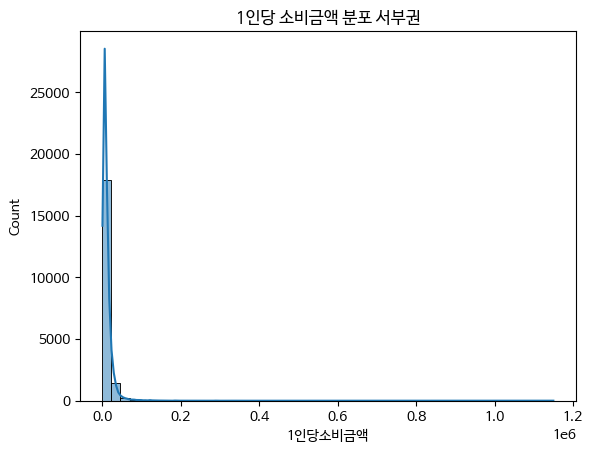

In [ ]:
# 분포 확인
## sns.histplot() : Seaborn의 히스토그램 함수. 수치형 데이터의 빈도 분포를 시각화.
## bins = 50 : 막대(빈)의 개수를 50개로 설정. 전체 소비금액 범위를 50개의 구간으로 나누고, 각 구간마다 몇 개의 값이 들어있는지 세는 방식.
## kde = True : KDE(Kernel Density Estimation)를 함께 그림. 즉, 분포의 부드러운 곡선형 밀도 추정선을 그림.
sns.histplot(activity_consume_west['1인당소비금액'], bins = 50, kde = True)
plt.title("1인당 소비금액 분포 서부권")
plt.show()

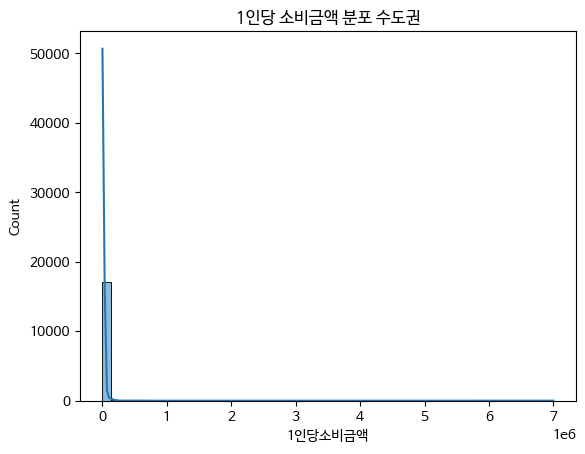

In [ ]:
sns.histplot(activity_consume_capital['1인당소비금액'], bins = 50, kde = True)
plt.title("1인당 소비금액 분포 수도권")
plt.show()

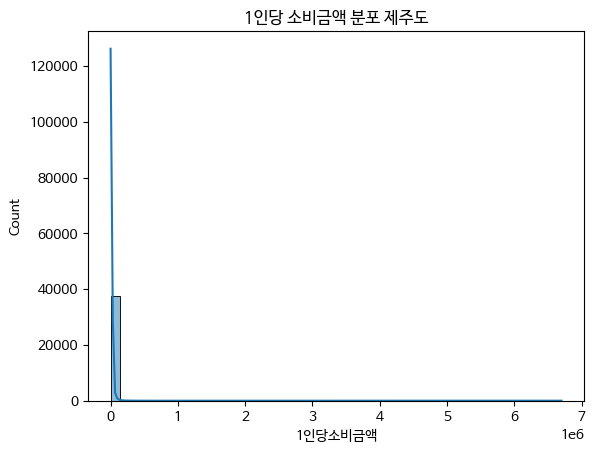

In [ ]:
sns.histplot(activity_consume_jeju['1인당소비금액'], bins = 50, kde = True)
plt.title("1인당 소비금액 분포 제주도")
plt.show()

In [ ]:
# 왜도 확인
## 왜도 > 0 : 오른쪽 꼬리가 긴 분포 (Positive Skew) → 평균 > 중앙값
## 왜도 < 0 : 왼쪽 꼬리가 긴 분포 (Negative Skew) → 평균 < 중앙값
activity_consume_west['1인당소비금액'].skew()

np.float64(23.933150261961018)

In [ ]:
activity_consume_capital['1인당소비금액'].skew()

np.float64(56.79120480323393)

In [ ]:
activity_consume_jeju['1인당소비금액'].skew()

np.float64(96.5569671756508)

In [ ]:
# 이상치 확인 서부권
Q1 = activity_consume_west['PAYMENT_AMT_WON'].quantile(0.25)
Q3 = activity_consume_west['PAYMENT_AMT_WON'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# PAYMENT_AMT_WON 값이 하한보다 작은 경우 (< lower_bound) 또는(|) 상한보다 큰 경우 (> upper_bound), outliers 변수에 담기
outliers = activity_consume_west[(activity_consume_west['PAYMENT_AMT_WON'] < lower_bound) |
                             (activity_consume_west['PAYMENT_AMT_WON'] > upper_bound)]
print("이상치 개수:", len(outliers))

이상치 개수: 1547


In [ ]:
# 이상치 확인 수도권
Q1 = activity_consume_capital['PAYMENT_AMT_WON'].quantile(0.25)
Q3 = activity_consume_capital['PAYMENT_AMT_WON'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# PAYMENT_AMT_WON 값이 하한보다 작은 경우 (< lower_bound) 또는(|) 상한보다 큰 경우 (> upper_bound), outliers 변수에 담기
outliers = activity_consume_capital[(activity_consume_capital['PAYMENT_AMT_WON'] < lower_bound) |
                             (activity_consume_capital['PAYMENT_AMT_WON'] > upper_bound)]
print("이상치 개수:", len(outliers))

이상치 개수: 1234


In [ ]:
# 이상치 확인 제주도
Q1 = activity_consume_jeju['PAYMENT_AMT_WON'].quantile(0.25)
Q3 = activity_consume_jeju['PAYMENT_AMT_WON'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# PAYMENT_AMT_WON 값이 하한보다 작은 경우 (< lower_bound) 또는(|) 상한보다 큰 경우 (> upper_bound), outliers 변수에 담기
outliers = activity_consume_jeju[(activity_consume_jeju['PAYMENT_AMT_WON'] < lower_bound) |
                             (activity_consume_jeju['PAYMENT_AMT_WON'] > upper_bound)]
print("이상치 개수:", len(outliers))

이상치 개수: 3014


In [ ]:
# 여행 단위로 중앙 값 계산 서부권
activity_consume_median_west = activity_consume_west.groupby('TRAVEL_ID', as_index=False)['1인당소비금액'].median().round(2)
activity_consume_median_west.columns = ['TRAVEL_ID', '1인당소비금액(중앙값)']
activity_consume_median_west

,TRAVEL_ID,1인당소비금액(중앙값)
0,a_a000202,6166.67
1,a_a000273,4000.00
2,a_a000319,16925.00
3,a_a000777,12400.00
4,a_a001091,8500.00
...,...,...
3895,d_d003718,5000.00
3896,d_d005282,6450.00
3897,d_d006707,6500.00
3898,d_d007111,11500.00


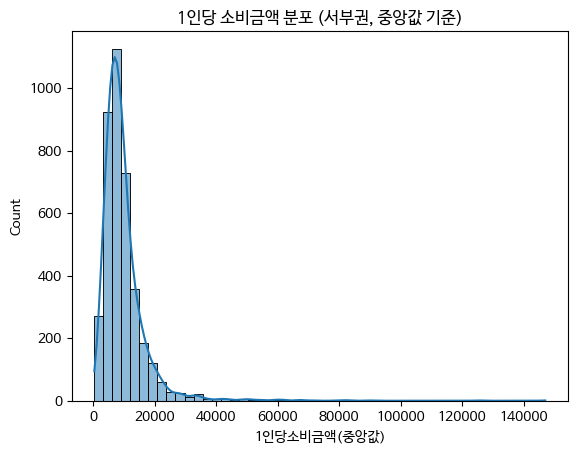

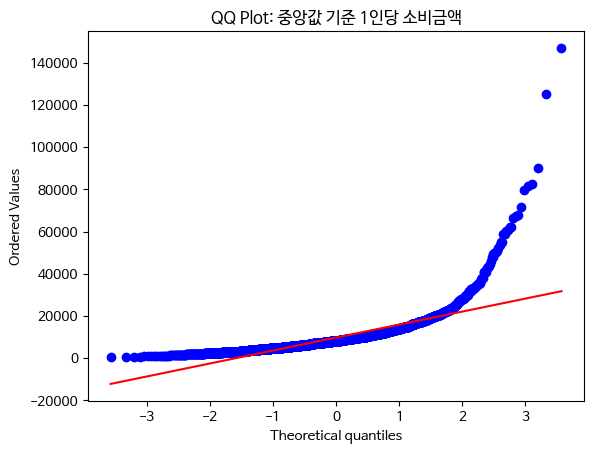

Shapiro-Wilk Test: stat = 0.6490, p-value = 3.750689785722006e-67


In [ ]:
# 정규성 검정

## 1. 시각화
sns.histplot(activity_consume_median_west['1인당소비금액(중앙값)'], bins=50, kde=True)
plt.title("1인당 소비금액 분포 (서부권, 중앙값 기준)")
plt.show()

## 2. QQ Plot
### 의미: 데이터의 분위수(quantile)와 정규분포의 분위수를 비교해 시각적으로 정규성 여부 판단
### 빨간 직선: 이론적인 정규분포 분위수 / 파란 점: 실제 데이터의 분위수
### 만약 정규분포를 따른다면 → 점들이 거의 직선 위에 있어야 함
stats.probplot(activity_consume_median_west['1인당소비금액(중앙값)'], dist="norm", plot=plt)
plt.title("QQ Plot: 중앙값 기준 1인당 소비금액")
plt.show()

## 3. Shapiro-Wilk Test
### p-value < 0.05: 귀무가설 기각 → 정규분포 아님
stat, p = stats.shapiro(activity_consume_median_west['1인당소비금액(중앙값)'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

In [ ]:
# 여행 단위로 중앙 값 계산 수도권
activity_consume_median_capital = activity_consume_capital.groupby('TRAVEL_ID', as_index=False)['1인당소비금액'].median().round(2)
activity_consume_median_capital.columns = ['TRAVEL_ID', '1인당소비금액(중앙값)']
activity_consume_median_capital

,TRAVEL_ID,1인당소비금액(중앙값)
0,a_a000011,17507.50
1,a_a000012,8950.00
2,a_a000013,14333.33
3,a_a000014,4156.25
4,a_a000016,12450.00
...,...,...
3861,d_d004639,27500.00
3862,d_d004784,8750.00
3863,d_d007564,25875.00
3864,d_d008179,5830.00


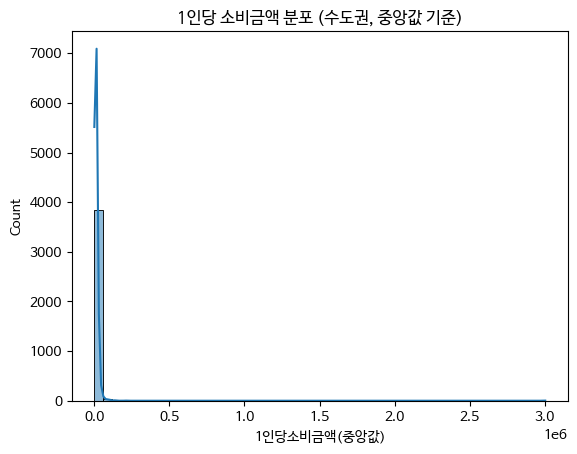

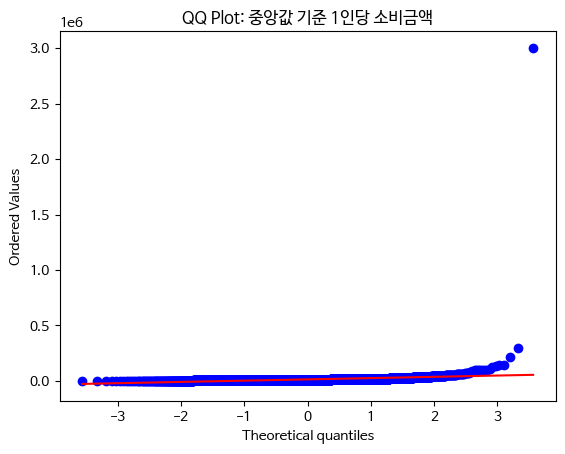

Shapiro-Wilk Test: stat = 0.0556, p-value = 9.280912555624139e-88


In [ ]:
# 정규성 검정

## 1. 시각화
sns.histplot(activity_consume_median_capital['1인당소비금액(중앙값)'], bins=50, kde=True)
plt.title("1인당 소비금액 분포 (수도권, 중앙값 기준)")
plt.show()

## 2. QQ Plot
stats.probplot(activity_consume_median_capital['1인당소비금액(중앙값)'], dist="norm", plot=plt)
plt.title("QQ Plot: 중앙값 기준 1인당 소비금액")
plt.show()

## 3. Shapiro-Wilk Test
stat, p = stats.shapiro(activity_consume_median_capital['1인당소비금액(중앙값)'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

In [ ]:
# 여행 단위로 중앙 값 계산 제주도
activity_consume_median_jeju = activity_consume_jeju.groupby('TRAVEL_ID', as_index=False)['1인당소비금액'].median().round(2)
activity_consume_median_jeju.columns = ['TRAVEL_ID', '1인당소비금액(중앙값)']
activity_consume_median_jeju

,TRAVEL_ID,1인당소비금액(중앙값)
0,a_a000007,5000.0
1,a_a000047,6425.0
2,a_a000095,15400.0
3,a_a000159,7387.5
4,a_a000169,6125.0
...,...,...
3951,d_d012488,9880.0
3952,d_d012489,27500.0
3953,d_d012490,26000.0
3954,d_d012491,7775.0


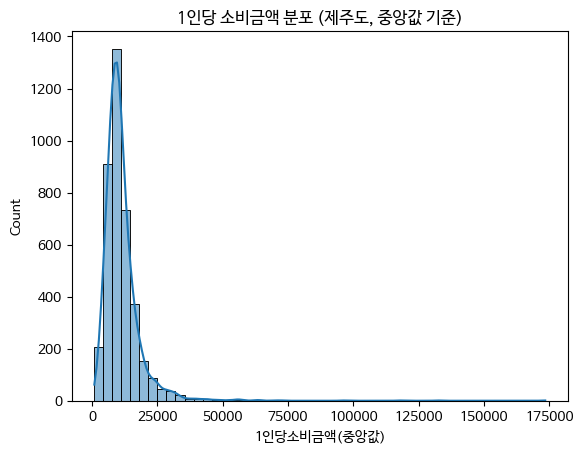

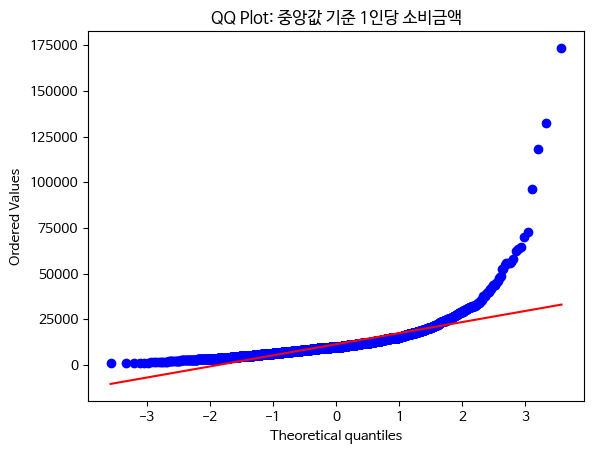

Shapiro-Wilk Test: stat = 0.6536, p-value = 3.3330606163747094e-67


In [ ]:
# 정규성 검정

## 1. 시각화
sns.histplot(activity_consume_median_jeju['1인당소비금액(중앙값)'], bins=50, kde=True)
plt.title("1인당 소비금액 분포 (제주도, 중앙값 기준)")
plt.show()

## 2. QQ Plot
stats.probplot(activity_consume_median_jeju['1인당소비금액(중앙값)'], dist="norm", plot=plt)
plt.title("QQ Plot: 중앙값 기준 1인당 소비금액")
plt.show()

## 3. Shapiro-Wilk Test
stat, p = stats.shapiro(activity_consume_median_jeju['1인당소비금액(중앙값)'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

**이상치가 많으므로 중앙 값 사용**

In [ ]:
# 데이터 확인용 csv 파일 저장
activity_consume_median_west.to_csv('activity_consume_median_west.csv', index=False, encoding='utf-8')
activity_consume_median_capital.to_csv('activity_consume_median_capital.csv', index=False, encoding='utf-8')
activity_consume_median_jeju.to_csv('activity_consume_median_jeju.csv', index=False, encoding='utf-8')

# 동반자정보 테이블 전처리

In [ ]:
companion_filepath_west_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/ts/tn_companion_info_동반자정보_C.csv'
companion_filepath_west_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/vs/tn_companion_info_동반자정보_C.csv'

companion_filepath_capital_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/ts/tn_companion_info_동반자정보_A.csv'
companion_filepath_capital_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/vs/tn_companion_info_동반자정보_A.csv'

companion_filepath_jeju_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/ts/tn_companion_info_동반자정보_D.csv'
companion_filepath_jeju_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/vs/tn_companion_info_동반자정보_D.csv'

companion_info_west_ts = load_data(companion_filepath_west_ts)
companion_info_west_vs = load_data(companion_filepath_west_vs)

companion_info_capital_ts = load_data(companion_filepath_capital_ts)
companion_info_capital_vs = load_data(companion_filepath_capital_vs)

companion_info_jeju_ts = load_data(companion_filepath_jeju_ts)
companion_info_jeju_vs = load_data(companion_filepath_jeju_vs)

In [ ]:
companion_info_west_ts.info()
companion_info_capital_ts.info()
companion_info_jeju_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        4741 non-null   int64 
 1   TRAVEL_ID            4741 non-null   object
 2   REL_CD               4741 non-null   int64 
 3   COMPANION_GENDER     4741 non-null   int64 
 4   COMPANION_AGE_GRP    4741 non-null   int64 
 5   COMPANION_SITUATION  4741 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 222.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        4123 non-null   int64 
 1   TRAVEL_ID            4123 non-null   object
 2   REL_CD               4123 non-null   int64 
 3   COMPANION_GENDER     4123 non-null   int64 
 4   COMPANION_AGE_GRP    4123 non-null   int64 
 

In [ ]:
companion_info_west_vs.info()
companion_info_capital_vs.info()
companion_info_jeju_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        592 non-null    int64 
 1   TRAVEL_ID            592 non-null    object
 2   REL_CD               592 non-null    int64 
 3   COMPANION_GENDER     592 non-null    int64 
 4   COMPANION_AGE_GRP    592 non-null    int64 
 5   COMPANION_SITUATION  592 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 27.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        515 non-null    int64 
 1   TRAVEL_ID            515 non-null    object
 2   REL_CD               515 non-null    int64 
 3   COMPANION_GENDER     515 non-null    int64 
 4   COMPANION_AGE_GRP    515 non-null    int64 
 5   C

In [ ]:
companion_info_west_merged = merge_data(companion_info_west_ts, companion_info_west_vs)
companion_info_west_merged

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,10,c_c000341,7,2,4,1
1,2,c_c000783,2,2,1,1
2,1,c_c009513,3,2,7,1
3,3,c_c000285,6,1,4,1
4,1,c_c003093,2,2,3,1
...,...,...,...,...,...,...
5328,3,c_c002935,11,2,4,1
5329,2,c_c002926,7,2,3,1
5330,2,c_c002451,7,1,6,3
5331,1,c_c009853,7,1,3,3


In [ ]:
companion_info_capital_merged = merge_data(companion_info_capital_ts, companion_info_capital_vs)
companion_info_capital_merged

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,9,a_a003353,10,1,3,2
1,1,a_a007584,7,2,3,3
2,2,a_a003406,2,2,1,1
3,1,a_a004691,1,1,6,1
4,1,a_a008467,8,2,4,1
...,...,...,...,...,...,...
4633,1,a_a001060,8,1,3,1
4634,1,a_a000383,7,1,4,1
4635,1,a_a017876,3,2,8,1
4636,2,a_a002399,7,2,7,3


In [ ]:
companion_info_jeju_merged = merge_data(companion_info_jeju_ts, companion_info_jeju_vs)
companion_info_jeju_merged

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,1,a_a002792,1,2,4,1
1,1,d_d007844,7,2,4,1
2,4,d_d006063,3,2,8,1
3,1,d_d002910,1,2,5,1
4,1,d_d001678,2,2,3,3
...,...,...,...,...,...,...
5532,5,c_c000583,7,2,3,1
5533,4,d_d001984,2,2,1,1
5534,1,d_d010596,8,1,3,1
5535,1,b_b000543,1,1,6,1


In [ ]:
companion_info_columns = ['TRAVEL_ID', 'REL_CD', 'COMPANION_SITUATION']
companion_info_west = filter_data(companion_info_west_merged, companion_info_columns)
companion_info_west

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,c_c000341,7,1
1,c_c000783,2,1
2,c_c009513,3,1
3,c_c000285,6,1
4,c_c003093,2,1
...,...,...,...
5328,c_c002935,11,1
5329,c_c002926,7,1
5330,c_c002451,7,3
5331,c_c009853,7,3


In [ ]:
companion_info_capital = filter_data(companion_info_capital_merged, companion_info_columns)
companion_info_capital

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,a_a003353,10,2
1,a_a007584,7,3
2,a_a003406,2,1
3,a_a004691,1,1
4,a_a008467,8,1
...,...,...,...
4633,a_a001060,8,1
4634,a_a000383,7,1
4635,a_a017876,3,1
4636,a_a002399,7,3


In [ ]:
companion_info_jeju = filter_data(companion_info_jeju_merged, companion_info_columns)
companion_info_jeju

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,a_a002792,1,1
1,d_d007844,7,1
2,d_d006063,3,1
3,d_d002910,1,1
4,d_d001678,2,3
...,...,...,...
5532,c_c000583,7,1
5533,d_d001984,2,1
5534,d_d010596,8,1
5535,b_b000543,1,1


In [ ]:
# TRAVEL_ID별로 COMPANION_SITUATION이 전부 1(계속여행)인지 확인
## .groupby('TRAVEL_ID')['COMPANION_SITUATION'] : TRAVEL_ID가 같은 데이터끼리 그룹으로 묶고, 그 그룹에서 COMPANION_SITUATION 열만 선택
## .apply(lambda x: ...) : 각 그룹(즉, TRAVEL_ID별 데이터)에 대해 lambda 함수를 적용
## set(x) : 리스트나 시리즈에서 중복을 제거한 고유값만 집합(set)으로 만듦  ## set([1, 1, 1])   → {1}
companion_info_west_valid = companion_info_west.groupby('TRAVEL_ID')['COMPANION_SITUATION'].apply(lambda x: set(x) == {1})
companion_info_west_valid

,COMPANION_SITUATION
TRAVEL_ID,
a_a000202,True
a_a000273,True
a_a000319,False
a_a000777,True
a_a001091,True
...,...
c_c014424,True
d_d002373,True
d_d003718,False


In [ ]:
companion_info_capital_valid = companion_info_capital.groupby('TRAVEL_ID')['COMPANION_SITUATION'].apply(lambda x: set(x) == {1})
companion_info_capital_valid

,COMPANION_SITUATION
TRAVEL_ID,
a_a000011,True
a_a000013,True
a_a000014,False
a_a000018,True
a_a000019,True
...,...
d_d002276,True
d_d004175,False
d_d004639,True


In [ ]:
companion_info_jeju_valid = companion_info_jeju.groupby('TRAVEL_ID')['COMPANION_SITUATION'].apply(lambda x: set(x) == {1})
companion_info_jeju_valid

,COMPANION_SITUATION
TRAVEL_ID,
a_a000007,True
a_a000047,True
a_a000095,True
a_a000159,True
a_a000169,True
...,...
d_d012443,True
d_d012446,True
d_d012472,True


In [ ]:
# 조건 만족하는 TRAVEL_ID만 추출
## companion_info_valid[companion_info_valid] : 자기 자신을 조건으로 필터링 == companion_info_valid[companion_info_valid == True]
companion_info_west_valid = companion_info_west_valid[companion_info_west_valid].index
companion_info_west_valid

Index(['a_a000202', 'a_a000273', 'a_a000777', 'a_a001091', 'a_a001146',
       'a_a001707', 'a_a001711', 'a_a001849', 'a_a001916', 'a_a002375',
       ...
       'c_c014414', 'c_c014415', 'c_c014418', 'c_c014420', 'c_c014421',
       'c_c014423', 'c_c014424', 'd_d002373', 'd_d006707', 'd_d010224'],
      dtype='object', name='TRAVEL_ID', length=2393)

In [ ]:
companion_info_capital_valid = companion_info_capital_valid[companion_info_capital_valid].index
companion_info_capital_valid

Index(['a_a000011', 'a_a000013', 'a_a000018', 'a_a000019', 'a_a000024',
       'a_a000028', 'a_a000029', 'a_a000030', 'a_a000034', 'a_a000051',
       ...
       'c_c011878', 'c_c014246', 'd_d000936', 'd_d000959', 'd_d001271',
       'd_d001303', 'd_d002276', 'd_d004639', 'd_d008179', 'd_d009226'],
      dtype='object', name='TRAVEL_ID', length=2170)

In [ ]:
companion_info_jeju_valid = companion_info_jeju_valid[companion_info_jeju_valid].index
companion_info_jeju_valid

Index(['a_a000007', 'a_a000047', 'a_a000095', 'a_a000159', 'a_a000169',
       'a_a000197', 'a_a000220', 'a_a000275', 'a_a000310', 'a_a000317',
       ...
       'd_d012401', 'd_d012407', 'd_d012412', 'd_d012429', 'd_d012434',
       'd_d012443', 'd_d012446', 'd_d012472', 'd_d012487', 'd_d012491'],
      dtype='object', name='TRAVEL_ID', length=2388)

In [ ]:
# companion_info에서 해당 ID만 남기기
## .isin(companion_info_valid) : TRAVEL_ID가 companion_info_valid 목록에 있는지 True/False로 판단
## companion_info[...] : [] 안의 조건에 대해 True인 열만 남김
companion_info_west_filtered = companion_info_west[companion_info_west['TRAVEL_ID'].isin(companion_info_west_valid)]
companion_info_west_filtered

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,c_c000341,7,1
1,c_c000783,2,1
2,c_c009513,3,1
3,c_c000285,6,1
4,c_c003093,2,1
...,...,...,...
5325,c_c002954,2,1
5326,c_c000730,2,1
5328,c_c002935,11,1
5329,c_c002926,7,1


In [ ]:
companion_info_capital_filtered = companion_info_capital[companion_info_capital['TRAVEL_ID'].isin(companion_info_capital_valid)]
companion_info_capital_filtered

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
2,a_a003406,2,1
3,a_a004691,1,1
4,a_a008467,8,1
6,a_a001509,8,1
7,a_a007442,8,1
...,...,...,...
4631,a_a007332,2,1
4632,a_a006844,7,1
4633,a_a001060,8,1
4634,a_a000383,7,1


In [ ]:
companion_info_jeju_filtered = companion_info_jeju[companion_info_jeju['TRAVEL_ID'].isin(companion_info_jeju_valid)]
companion_info_jeju_filtered

,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,a_a002792,1,1
1,d_d007844,7,1
2,d_d006063,3,1
3,d_d002910,1,1
5,a_a003310,9,1
...,...,...,...
5532,c_c000583,7,1
5533,d_d001984,2,1
5534,d_d010596,8,1
5535,b_b000543,1,1


In [ ]:
# REL_CD 매핑
## 관계 코드표 불러오기
code_df = load_data(r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tc_codeb_코드B.csv')

## 동반자 관계 코드만 필터링
rel_cd_map = code_df[code_df['cd_a'] == 'TCR'][['cd_b', 'cd_nm']]

## 딕셔너리로 변환
### zip(a, b)는 두 리스트를 묶어서 튜플의 반복자(iterator)를 만듦  ### [(1, '배우자'), (2, '자녀'), ...]
### 여기에 dict()를 입히면 → 첫 번째 값이 key, 두 번째 값이 value인 딕셔너리가 됨
rel_cd_dict = dict(zip(rel_cd_map['cd_b'], rel_cd_map['cd_nm']))

## companion_info의 REL_CD에 적용
### .astype(str) : pandas에서 컬럼의 데이터 타입을 문자열(str)로 변환할 때 사용하는 함수
### .map() : pandas Series에서 값을 변환하거나 매핑할 때 쓰는 함수 ### Series.map(매핑규칙 또는 함수)
companion_info_west_filtered.loc[:, 'REL_CD'] = companion_info_west_filtered['REL_CD'].astype(str).map(rel_cd_dict)
companion_info_west_filtered

/tmp/ipython-input-1694751848.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['친구' '자녀' '부모' ... '기타' '친구' '연인']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  companion_info_west_filtered.loc[:, 'REL_CD'] = companion_info_west_filtered['REL_CD'].astype(str).map(rel_cd_dict)


,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,c_c000341,친구,1
1,c_c000783,자녀,1
2,c_c009513,부모,1
3,c_c000285,친인척,1
4,c_c003093,자녀,1
...,...,...,...
5325,c_c002954,자녀,1
5326,c_c000730,자녀,1
5328,c_c002935,기타,1
5329,c_c002926,친구,1


In [ ]:
companion_info_capital_filtered.loc[:, 'REL_CD'] = companion_info_capital_filtered['REL_CD'].astype(str).map(rel_cd_dict)
companion_info_capital_filtered

/tmp/ipython-input-1486090819.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['자녀' '배우자' '연인' ... '연인' '친구' '부모']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  companion_info_capital_filtered.loc[:, 'REL_CD'] = companion_info_capital_filtered['REL_CD'].astype(str).map(rel_cd_dict)


,TRAVEL_ID,REL_CD,COMPANION_SITUATION
2,a_a003406,자녀,1
3,a_a004691,배우자,1
4,a_a008467,연인,1
6,a_a001509,연인,1
7,a_a007442,연인,1
...,...,...,...
4631,a_a007332,자녀,1
4632,a_a006844,친구,1
4633,a_a001060,연인,1
4634,a_a000383,친구,1


In [ ]:
companion_info_jeju_filtered.loc[:, 'REL_CD'] = companion_info_jeju_filtered['REL_CD'].astype(str).map(rel_cd_dict)
companion_info_jeju_filtered

/tmp/ipython-input-2493546788.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['배우자' '친구' '부모' ... '연인' '배우자' '친인척']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  companion_info_jeju_filtered.loc[:, 'REL_CD'] = companion_info_jeju_filtered['REL_CD'].astype(str).map(rel_cd_dict)


,TRAVEL_ID,REL_CD,COMPANION_SITUATION
0,a_a002792,배우자,1
1,d_d007844,친구,1
2,d_d006063,부모,1
3,d_d002910,배우자,1
5,a_a003310,동료,1
...,...,...,...
5532,c_c000583,친구,1
5533,d_d001984,자녀,1
5534,d_d010596,연인,1
5535,b_b000543,배우자,1


In [ ]:
# TRAVEL_ID를 기준으로 REL_CD 합치기
companion_info_unique_west = (
    companion_info_west_filtered.groupby('TRAVEL_ID')['REL_CD']  # TRAVEL_ID를 기준으로 그룹을 만들고, 각 그룹에서 REL_CD만 뽑아냄
    .apply(lambda x: ','.join(sorted(set(x))))  # 중복 제거(set) 후 정렬(sorted) → 정렬된 리스트를 쉼표(,)로 이어 붙여서 하나의 문자열로 만듦
    .reset_index()  # .reset_index()로 다시 DataFrame 형태로 변환
)

companion_info_unique_west

,TRAVEL_ID,REL_CD
0,a_a000202,"배우자,자녀"
1,a_a000273,"배우자,친구"
2,a_a000777,연인
3,a_a001091,친구
4,a_a001146,친구
...,...,...
2388,c_c014423,부모
2389,c_c014424,연인
2390,d_d002373,"배우자,자녀"
2391,d_d006707,부모


In [ ]:
companion_info_unique_capital = (
    companion_info_capital_filtered.groupby('TRAVEL_ID')['REL_CD']  # TRAVEL_ID를 기준으로 그룹을 만들고, 각 그룹에서 REL_CD만 뽑아냄
    .apply(lambda x: ','.join(sorted(set(x))))  # 중복 제거(set) 후 정렬(sorted) → 정렬된 리스트를 쉼표(,)로 이어 붙여서 하나의 문자열로 만듦
    .reset_index()  # .reset_index()로 다시 DataFrame 형태로 변환
)

companion_info_unique_capital

,TRAVEL_ID,REL_CD
0,a_a000011,"친인척,형제/자매"
1,a_a000013,"연인,친구"
2,a_a000018,"배우자,자녀"
3,a_a000019,"기타,동료"
4,a_a000024,형제/자매
...,...,...
2165,d_d001303,"배우자,자녀"
2166,d_d002276,"친인척,형제/자매"
2167,d_d004639,배우자
2168,d_d008179,연인


In [ ]:
companion_info_unique_jeju = (
    companion_info_jeju_filtered.groupby('TRAVEL_ID')['REL_CD']  # TRAVEL_ID를 기준으로 그룹을 만들고, 각 그룹에서 REL_CD만 뽑아냄
    .apply(lambda x: ','.join(sorted(set(x))))  # 중복 제거(set) 후 정렬(sorted) → 정렬된 리스트를 쉼표(,)로 이어 붙여서 하나의 문자열로 만듦
    .reset_index()  # .reset_index()로 다시 DataFrame 형태로 변환
)

companion_info_unique_jeju

,TRAVEL_ID,REL_CD
0,a_a000007,"배우자,자녀"
1,a_a000047,"배우자,자녀,친인척"
2,a_a000095,"배우자,자녀"
3,a_a000159,"배우자,자녀"
4,a_a000169,"배우자,자녀,형제/자매"
...,...,...
2383,d_d012443,"배우자,자녀"
2384,d_d012446,자녀
2385,d_d012472,"배우자,부모,형제/자매"
2386,d_d012487,배우자


In [ ]:
# 데이터 확인용 csv 파일 저장
companion_info_unique_west.to_csv('companion_info_unique_west.csv', index=False, encoding='utf-8')
companion_info_unique_capital.to_csv('companion_info_unique_capital.csv', index=False, encoding='utf-8')
companion_info_unique_jeju.to_csv('companion_info_unique_jeju.csv', index=False, encoding='utf-8')

# 여행 테이블 전처리

In [ ]:
travel_filepath_west_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/ts/tn_travel_여행_C.csv'
travel_filepath_west_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/vs/tn_travel_여행_C.csv'

travel_filepath_capital_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/ts/tn_travel_여행_A.csv'
travel_filepath_capital_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/vs/tn_travel_여행_A.csv'

travel_filepath_jeju_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/ts/tn_travel_여행_D.csv'
travel_filepath_jeju_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/vs/tn_travel_여행_D.csv'


travel_west_ts = load_data(travel_filepath_west_ts)
travel_west_vs = load_data(travel_filepath_west_vs)

travel_capital_ts = load_data(travel_filepath_capital_ts)
travel_capital_vs = load_data(travel_filepath_capital_vs)

travel_jeju_ts = load_data(travel_filepath_jeju_ts)
travel_jeju_vs = load_data(travel_filepath_jeju_vs)

In [ ]:
travel_west_ts.info()
travel_west_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             3200 non-null   object
 1   TRAVEL_NM             3200 non-null   object
 2   TRAVELER_ID           3200 non-null   object
 3   TRAVEL_PURPOSE        3200 non-null   object
 4   TRAVEL_START_YMD      3200 non-null   object
 5   TRAVEL_END_YMD        3200 non-null   object
 6   MVMN_NM               2480 non-null   object
 7   TRAVEL_PERSONA        466 non-null    object
 8   TRAVEL_MISSION        3200 non-null   object
 9   TRAVEL_MISSION_CHECK  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             400 non-null    ob

In [ ]:
travel_capital_ts.info()
travel_capital_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             3200 non-null   object
 1   TRAVEL_NM             3200 non-null   object
 2   TRAVELER_ID           3200 non-null   object
 3   TRAVEL_PURPOSE        3200 non-null   object
 4   TRAVEL_START_YMD      3200 non-null   object
 5   TRAVEL_END_YMD        3200 non-null   object
 6   MVMN_NM               2484 non-null   object
 7   TRAVEL_PERSONA        1040 non-null   object
 8   TRAVEL_MISSION        3200 non-null   object
 9   TRAVEL_MISSION_CHECK  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             400 non-null    ob

In [ ]:
travel_jeju_ts.info()
travel_jeju_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             3200 non-null   object
 1   TRAVEL_NM             3200 non-null   object
 2   TRAVELER_ID           3200 non-null   object
 3   TRAVEL_PURPOSE        3200 non-null   object
 4   TRAVEL_START_YMD      3200 non-null   object
 5   TRAVEL_END_YMD        3200 non-null   object
 6   MVMN_NM               3063 non-null   object
 7   TRAVEL_PERSONA        870 non-null    object
 8   TRAVEL_MISSION        3200 non-null   object
 9   TRAVEL_MISSION_CHECK  3200 non-null   object
dtypes: object(10)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             400 non-null    ob

In [ ]:
travel_west_merged = merge_data(travel_west_ts, travel_west_vs)
travel_west_merged

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,c_c011995,C02,c011995,21;22;26;,2022-10-30,2022-10-31,자가용,NaN,21;22;26;,21;24;26
1,c_c008882,C06,c008882,2;6;,2022-11-06,2022-11-07,NaN,NaN,2;6;,2;24;11
2,c_c003940,C01,c003940,22;4;,2022-10-01,2022-10-03,자가용,NaN,22;4;,22;3;4
3,c_c012638,C01,c012638,26;1;22;7;24;6;6;9;,2022-10-30,2022-11-01,자가용,NaN,26;1;22;7;24;6;6;9;,1;6;7
4,c_c011983,C03,c011983,22;23;26;4;,2022-10-29,2022-10-31,자가용,NaN,22;23;26;4;,5;22;26
...,...,...,...,...,...,...,...,...,...,...
3595,c_c014410,C06,c014410,22;24;,2022-11-12,2022-11-13,NaN,NaN,22;24;,6;9;22
3596,c_c000108,C02,c000108,12;3;4;,2022-08-15,2022-08-18,자가용,NaN,3;,3;4;10
3597,c_c001636,C06,c001636,2;22;3;5;,2022-08-27,2022-08-29,자가용,NaN,2;22;3;5;,1;2;3
3598,b_b014399,C05,b014399,8;22;26;1;,2022-11-05,2022-11-07,자가용,NaN,8;22;26;1;,8;3;26


In [ ]:
travel_capital_merged = merge_data(travel_capital_ts, travel_capital_vs)
travel_capital_merged

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,a_a014262,A03,a014262,1;11;2;22;,2022-10-29,2022-10-30,자가용,NaN,1;11;2;22;,2;1;22
1,a_a006728,A03,a006728,21;24;5;22;26;27;,2022-10-10,2022-10-11,자가용,NaN,21;24;5;22;26;27;,6;1;22
2,a_a015745,A02,a015745,1;2;6;,2022-10-31,2022-11-03,대중교통 등,NaN,1;2;6;,13;3;28
3,a_a010544,A03,a010544,21;22;24;26;,2022-11-01,2022-11-02,자가용,NaN,21;22;24;26;,1;22;26
4,a_a012058,A03,a012058,1;4;10;12;21;22;26;,2022-11-05,2022-11-06,대중교통 등,수도권 외 거주 39세 이하 커플,1;4;10;12;21;22;26;,1;21;22
...,...,...,...,...,...,...,...,...,...,...
3595,a_a003981,A01,a003981,22;6;,2022-09-30,2022-10-03,대중교통 등,NaN,22;6;,6;24;22
3596,a_a007614,A01,a007614,2;22;,2022-10-23,2022-10-24,NaN,수도권 거주 39세 이하 자녀 동반,2;22;,1;9;22
3597,a_a003225,A03,a003225,11;2;3;5;6;,2022-09-24,2022-09-26,자가용,수도권 거주 39세 이하 커플,11;2;3;5;6;,2;6;5
3598,a_a009624,A03,a009624,1;22;3;,2022-10-16,2022-10-17,자가용,NaN,1;22;3;,3;22;1


In [ ]:
travel_jeju_merged = merge_data(travel_jeju_ts, travel_jeju_vs)
travel_jeju_merged

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,b_b010312,D02,b010312,1;21;22;24;27;,2022-10-29,2022-10-31,대중교통 등,NaN,1;21;22;24;27;,21;22;26
1,b_b005266,D02,b005266,21;22;23;24;26;,2022-10-12,2022-10-14,자가용,NaN,21;22;23;24;26;,12;22;3
2,d_d000296,D01,d000296,2;,2022-08-18,2022-08-22,대중교통 등,40세 이상 자녀 동반 여행,2;,2;28;12
3,d_d002565,D01,d002565,22;23;,2022-10-29,2022-11-01,자가용,NaN,22;23;,22;23;2
4,d_d006390,D01,d006390,2;22;4;5;6;,2022-10-15,2022-10-19,대중교통 등,39세 이하 3인 이상 친구,2;22;4;5;6;,5;22;6
...,...,...,...,...,...,...,...,...,...,...
3595,a_a008632,D02,a008632,2;27;4;21;,2022-10-29,2022-10-31,자가용,NaN,2;27;4;21;,2;4;27
3596,d_d000998,D01,d000998,1;2;23;4;5;,2022-08-27,2022-08-30,대중교통 등,NaN,1;2;23;4;5;,1;2;13
3597,a_a000311,D02,a000311,1;10;2;22;23;,2022-08-26,2022-08-28,자가용,수도권 거주 39세 이하 3인 이상 친구,1;10;2;22;23;,1;2;23
3598,d_d004203,D01,d004203,21;23;24;28;6;,2022-10-08,2022-10-11,자가용,NaN,21;23;24;28;6;,21;28;22


In [ ]:
travel_columns = ['TRAVEL_ID', 'TRAVELER_ID', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD']
travel_west = filter_data(travel_west_merged, travel_columns)
travel_west

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD
0,c_c011995,c011995,2022-10-30,2022-10-31
1,c_c008882,c008882,2022-11-06,2022-11-07
2,c_c003940,c003940,2022-10-01,2022-10-03
3,c_c012638,c012638,2022-10-30,2022-11-01
4,c_c011983,c011983,2022-10-29,2022-10-31
...,...,...,...,...
3595,c_c014410,c014410,2022-11-12,2022-11-13
3596,c_c000108,c000108,2022-08-15,2022-08-18
3597,c_c001636,c001636,2022-08-27,2022-08-29
3598,b_b014399,b014399,2022-11-05,2022-11-07


In [ ]:
travel_capital = filter_data(travel_capital_merged, travel_columns)
travel_capital

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD
0,a_a014262,a014262,2022-10-29,2022-10-30
1,a_a006728,a006728,2022-10-10,2022-10-11
2,a_a015745,a015745,2022-10-31,2022-11-03
3,a_a010544,a010544,2022-11-01,2022-11-02
4,a_a012058,a012058,2022-11-05,2022-11-06
...,...,...,...,...
3595,a_a003981,a003981,2022-09-30,2022-10-03
3596,a_a007614,a007614,2022-10-23,2022-10-24
3597,a_a003225,a003225,2022-09-24,2022-09-26
3598,a_a009624,a009624,2022-10-16,2022-10-17


In [ ]:
travel_jeju = filter_data(travel_jeju_merged, travel_columns)
travel_jeju

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD
0,b_b010312,b010312,2022-10-29,2022-10-31
1,b_b005266,b005266,2022-10-12,2022-10-14
2,d_d000296,d000296,2022-08-18,2022-08-22
3,d_d002565,d002565,2022-10-29,2022-11-01
4,d_d006390,d006390,2022-10-15,2022-10-19
...,...,...,...,...
3595,a_a008632,a008632,2022-10-29,2022-10-31
3596,d_d000998,d000998,2022-08-27,2022-08-30
3597,a_a000311,a000311,2022-08-26,2022-08-28
3598,d_d004203,d004203,2022-10-08,2022-10-11


In [ ]:
# 데이터 확인용 csv 파일 저장
travel_west.to_csv('travel_west.csv', index=False, encoding='utf-8')
travel_capital.to_csv('travel_capital.csv', index=False, encoding='utf-8')
travel_jeju.to_csv('travel_jeju.csv', index=False, encoding='utf-8')

# 여행객 테이블 전처리

In [ ]:
traveller_filepath_west_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/ts/tn_traveller_master_여행객 Master_C.csv'
traveller_filepath_west_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/west/vs/tn_traveller_master_여행객 Master_C.csv'

traveller_filepath_capital_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/ts/tn_traveller_master_여행객 Master_A.csv'
traveller_filepath_capital_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/capital/vs/tn_traveller_master_여행객 Master_A.csv'

traveller_filepath_jeju_ts = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/ts/tn_traveller_master_여행객 Master_D.csv'
traveller_filepath_jeju_vs = r'/content/drive/MyDrive/Colab Notebooks/project/resources/jeju/vs/tn_traveller_master_여행객 Master_D.csv'

traveller_west_ts = load_data(traveller_filepath_west_ts)
traveller_west_vs = load_data(traveller_filepath_west_vs)

traveller_capital_ts = load_data(traveller_filepath_capital_ts)
traveller_capital_vs = load_data(traveller_filepath_capital_vs)

traveller_jeju_ts = load_data(traveller_filepath_jeju_ts)
traveller_jeju_vs = load_data(traveller_filepath_jeju_vs)

In [ ]:
traveller_west_ts.info()
traveller_west_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                3200 non-null   object 
 1   RESIDENCE_SGG_CD           3200 non-null   int64  
 2   GENDER                     3200 non-null   object 
 3   AGE_GRP                    3200 non-null   int64  
 4   EDU_NM                     3200 non-null   int64  
 5   EDU_FNSH_SE                3200 non-null   int64  
 6   MARR_STTS                  3200 non-null   int64  
 7   FAMILY_MEMB                3200 non-null   int64  
 8   JOB_NM                     3057 non-null   float64
 9   JOB_ETC                    143 non-null    float64
 10  INCOME                     3200 non-null   int64  
 11  HOUSE_INCOME               2412 non-null   float64
 12  TRAVEL_TERM                3200 non-null   int64  
 13  TRAVEL_NUM                 3200 non-null   int64

In [ ]:
traveller_capital_ts.info()
traveller_capital_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                3200 non-null   object 
 1   RESIDENCE_SGG_CD           3200 non-null   int64  
 2   GENDER                     3200 non-null   object 
 3   AGE_GRP                    3200 non-null   int64  
 4   EDU_NM                     3200 non-null   int64  
 5   EDU_FNSH_SE                3199 non-null   float64
 6   MARR_STTS                  3198 non-null   float64
 7   FAMILY_MEMB                3200 non-null   int64  
 8   JOB_NM                     3059 non-null   float64
 9   JOB_ETC                    141 non-null    float64
 10  INCOME                     3200 non-null   int64  
 11  HOUSE_INCOME               2356 non-null   float64
 12  TRAVEL_TERM                3200 non-null   int64  
 13  TRAVEL_NUM                 3200 non-null   int64

In [ ]:
traveller_jeju_ts.info()
traveller_jeju_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                3200 non-null   object 
 1   RESIDENCE_SGG_CD           3200 non-null   int64  
 2   GENDER                     3200 non-null   object 
 3   AGE_GRP                    3200 non-null   int64  
 4   EDU_NM                     3200 non-null   int64  
 5   EDU_FNSH_SE                3200 non-null   int64  
 6   MARR_STTS                  3200 non-null   int64  
 7   FAMILY_MEMB                3200 non-null   int64  
 8   JOB_NM                     3083 non-null   float64
 9   JOB_ETC                    117 non-null    float64
 10  INCOME                     3200 non-null   int64  
 11  HOUSE_INCOME               2332 non-null   float64
 12  TRAVEL_TERM                3200 non-null   int64  
 13  TRAVEL_NUM                 3200 non-null   int64

In [ ]:
traveller_west_merged = merge_data(traveller_west_ts, traveller_west_vs)
traveller_west_merged

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,c003867,48,여,20,5,1,1,1,2.0,NaN,...,2,5,경상남도,전북,나홀로 여행,2022-09-29~2022-09-30,1.0,7.0,2.0,0
1,c000679,11,여,20,6,1,1,1,2.0,NaN,...,7,7,서울특별시,전북,2인 여행(가족 외),2022-08-21~2022-08-22,5.0,3.0,6.0,1
2,c013674,11,여,20,6,1,1,2,3.0,NaN,...,1,7,서울특별시,충남,부모 동반 여행,2022-11-05~2022-11-05,1.0,8.0,3.0,3
3,c010826,45,여,20,6,1,1,2,12.0,NaN,...,5,6,전라북도,전북,나홀로 여행,2022-10-27~2022-10-27,7.0,2.0,4.0,0
4,c012020,41,여,40,6,1,2,2,11.0,NaN,...,1,4,경기도,전북,2인 가족 여행,2022-10-29~2022-10-29,3.0,1.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,c006347,41,남,20,6,2,1,4,12.0,NaN,...,2,5,경기도,충북,부모 동반 여행,2022-10-28~2022-10-28,2.0,1.0,4.0,1
3596,c006086,45,남,30,6,1,1,3,5.0,NaN,...,3,2,전라북도,세종,2인 여행(가족 외),2022-10-15~2022-10-15,1.0,3.0,8.0,1
3597,c002467,46,여,20,6,1,1,3,4.0,NaN,...,5,3,전라남도,전남,3인 이상 여행(가족 외),2022-09-12~2022-09-13,3.0,2.0,1.0,2
3598,c003087,45,남,20,6,1,1,4,3.0,NaN,...,7,7,전라북도,충북,2인 여행(가족 외),2022-09-24~2022-09-25,7.0,3.0,2.0,1


In [ ]:
traveller_capital_merged = merge_data(traveller_capital_ts, traveller_capital_vs)
traveller_capital_merged

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b015583,41,여,20,6,1.0,1.0,5,3.0,NaN,...,1,7,경기도,충남,2인 여행(가족 외),2022-10-29~2022-10-30,1,NaN,NaN,1
1,a001105,30,남,30,6,1.0,1.0,2,3.0,NaN,...,6,5,대전광역시,경기,3인 이상 여행(가족 외),2022-09-03~2022-09-04,3,NaN,NaN,7
2,a001673,41,여,30,4,1.0,2.0,3,NaN,1.0,...,2,7,경기도,서울,자녀 동반 여행,2022-09-18~2022-09-19,10,7.0,1.0,2
3,a017690,41,여,30,6,1.0,1.0,3,3.0,NaN,...,4,5,경기도,서울,3인 이상 여행(가족 외),2022-11-12~2022-11-12,3,1.0,2.0,3
4,c006666,28,여,30,6,1.0,1.0,3,13.0,NaN,...,5,5,인천광역시,경기,나홀로 여행,2022-10-18~2022-10-18,1,7.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,a004964,11,여,20,6,1.0,1.0,1,13.0,NaN,...,5,7,서울특별시,경기,2인 여행(가족 외),2022-10-04~2022-10-05,1,3.0,5.0,1
3596,c002958,41,여,30,6,1.0,1.0,1,3.0,NaN,...,4,7,경기도,충남,2인 여행(가족 외),2022-10-01~2022-10-02,3,2.0,1.0,1
3597,a001933,28,여,40,6,1.0,2.0,3,3.0,NaN,...,2,6,인천광역시,경기,3인 이상 여행(가족 외),2022-09-18~2022-09-18,3,1.0,7.0,2
3598,a007599,41,남,40,6,1.0,2.0,4,3.0,NaN,...,5,6,경기도,경기,자녀 동반 여행,2022-10-16~2022-10-16,2,3.0,10.0,3


In [ ]:
traveller_jeju_merged = merge_data(traveller_jeju_ts, traveller_jeju_vs)
traveller_jeju_merged

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,b011774,31,여,30,6,1,1,1,3.0,NaN,...,2,6,울산광역시,경남,2인 가족 여행,2022-10-25~2022-10-26,2,1.0,5.0,1
1,d009928,29,여,20,6,2,1,4,12.0,NaN,...,1,7,광주광역시,제주,2인 여행(가족 외),2022-10-30~2022-11-01,2,1.0,5.0,1
2,d010131,26,남,20,7,2,1,1,12.0,NaN,...,2,7,부산광역시,제주,나홀로 여행,2022-11-02~2022-11-04,5,2.0,10.0,0
3,d006004,50,여,20,6,1,1,1,3.0,NaN,...,3,6,제주특별자치도,제주,2인 여행(가족 외),2022-10-30~2022-10-31,3,1.0,7.0,1
4,d002965,50,여,30,6,1,2,4,3.0,NaN,...,1,4,제주특별자치도,제주,자녀 동반 여행,2022-10-08~2022-10-10,3,1.0,8.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,d012387,50,남,40,4,1,2,2,1.0,NaN,...,7,1,제주특별자치도,제주,나홀로 여행,2022-11-11~2022-11-11,7,6.0,2.0,0
3596,d004823,50,남,40,6,1,1,1,2.0,NaN,...,1,4,제주특별자치도,제주,나홀로 여행,2022-10-19~2022-10-21,4,2.0,1.0,0
3597,d006166,11,여,50,6,1,2,3,5.0,NaN,...,6,4,서울특별시,제주,3대 동반 여행(친척 포함),2022-10-17~2022-10-20,2,6.0,7.0,2
3598,d011757,11,남,20,6,2,1,3,12.0,NaN,...,3,6,서울특별시,제주,2인 여행(가족 외),2022-11-07~2022-11-09,3,2.0,1.0,1


In [ ]:
traveller_columns = ['TRAVELER_ID', 'TRAVEL_COMPANIONS_NUM']
traveller_west = filter_data(traveller_west_merged, traveller_columns)
traveller_west

,TRAVELER_ID,TRAVEL_COMPANIONS_NUM
0,c003867,0
1,c000679,1
2,c013674,3
3,c010826,0
4,c012020,1
...,...,...
3595,c006347,1
3596,c006086,1
3597,c002467,2
3598,c003087,1


In [ ]:
traveller_capital = filter_data(traveller_capital_merged, traveller_columns)
traveller_capital

,TRAVELER_ID,TRAVEL_COMPANIONS_NUM
0,b015583,1
1,a001105,7
2,a001673,2
3,a017690,3
4,c006666,0
...,...,...
3595,a004964,1
3596,c002958,1
3597,a001933,2
3598,a007599,3


In [ ]:
traveller_jeju = filter_data(traveller_jeju_merged, traveller_columns)
traveller_jeju

,TRAVELER_ID,TRAVEL_COMPANIONS_NUM
0,b011774,1
1,d009928,1
2,d010131,0
3,d006004,1
4,d002965,3
...,...,...
3595,d012387,0
3596,d004823,0
3597,d006166,2
3598,d011757,1


In [ ]:
# 데이터 확인용 csv 파일 저장
traveller_west.to_csv('traveller_west.csv', index=False, encoding='utf-8')
traveller_capital.to_csv('traveller_capital.csv', index=False, encoding='utf-8')
traveller_jeju.to_csv('traveller_jeju.csv', index=False, encoding='utf-8')

# 데이터 합치기

In [ ]:
travel_west.info()
activity_consume_median_west.info()
companion_info_unique_west.info()
traveller_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         3600 non-null   object
 1   TRAVELER_ID       3600 non-null   object
 2   TRAVEL_START_YMD  3600 non-null   object
 3   TRAVEL_END_YMD    3600 non-null   object
dtypes: object(4)
memory usage: 112.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRAVEL_ID     3900 non-null   object 
 1   1인당소비금액(중앙값)  3900 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TRAVEL_ID  2393 non-null   object
 1   REL_CD     2393 n

In [ ]:
travel_capital.info()
activity_consume_median_capital.info()
companion_info_unique_capital.info()
traveller_capital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         3600 non-null   object
 1   TRAVELER_ID       3600 non-null   object
 2   TRAVEL_START_YMD  3600 non-null   object
 3   TRAVEL_END_YMD    3600 non-null   object
dtypes: object(4)
memory usage: 112.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRAVEL_ID     3866 non-null   object 
 1   1인당소비금액(중앙값)  3866 non-null   float64
dtypes: float64(1), object(1)
memory usage: 60.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TRAVEL_ID  2170 non-null   object
 1   REL_CD     2170 n

In [ ]:
travel_jeju.info()
activity_consume_median_jeju.info()
companion_info_unique_jeju.info()
traveller_jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         3600 non-null   object
 1   TRAVELER_ID       3600 non-null   object
 2   TRAVEL_START_YMD  3600 non-null   object
 3   TRAVEL_END_YMD    3600 non-null   object
dtypes: object(4)
memory usage: 112.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRAVEL_ID     3956 non-null   object 
 1   1인당소비금액(중앙값)  3956 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TRAVEL_ID  2388 non-null   object
 1   REL_CD     2388 n

In [ ]:
# TRAVEL_ID를 기준으로 inner 조인
travel_consume_west = pd.merge(travel_west, activity_consume_median_west, on = 'TRAVEL_ID', how = 'inner')
travel_consume_west

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값)
0,c_c011995,c011995,2022-10-30,2022-10-31,6950.0
1,c_c008882,c008882,2022-11-06,2022-11-07,1875.0
2,c_c003940,c003940,2022-10-01,2022-10-03,18350.0
3,c_c012638,c012638,2022-10-30,2022-11-01,17100.0
4,c_c011983,c011983,2022-10-29,2022-10-31,7000.0
...,...,...,...,...,...
3505,c_c014410,c014410,2022-11-12,2022-11-13,14000.0
3506,c_c000108,c000108,2022-08-15,2022-08-18,6500.0
3507,c_c001636,c001636,2022-08-27,2022-08-29,7000.0
3508,b_b014399,b014399,2022-11-05,2022-11-07,9500.0


In [ ]:
travel_consume_capital = pd.merge(travel_capital, activity_consume_median_capital, on = 'TRAVEL_ID', how = 'inner')
travel_consume_capital

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값)
0,a_a014262,a014262,2022-10-29,2022-10-30,5750.0
1,a_a006728,a006728,2022-10-10,2022-10-11,8300.0
2,a_a015745,a015745,2022-10-31,2022-11-03,6200.0
3,a_a010544,a010544,2022-11-01,2022-11-02,14000.0
4,a_a012058,a012058,2022-11-05,2022-11-06,13250.0
...,...,...,...,...,...
3470,a_a003981,a003981,2022-09-30,2022-10-03,12000.0
3471,a_a007614,a007614,2022-10-23,2022-10-24,2350.0
3472,a_a003225,a003225,2022-09-24,2022-09-26,13000.0
3473,a_a009624,a009624,2022-10-16,2022-10-17,18000.0


In [ ]:
travel_consume_jeju = pd.merge(travel_jeju, activity_consume_median_jeju, on = 'TRAVEL_ID', how = 'inner')
travel_consume_jeju

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값)
0,b_b010312,b010312,2022-10-29,2022-10-31,9000.0
1,b_b005266,b005266,2022-10-12,2022-10-14,9500.0
2,d_d000296,d000296,2022-08-18,2022-08-22,10000.0
3,d_d002565,d002565,2022-10-29,2022-11-01,10000.0
4,d_d006390,d006390,2022-10-15,2022-10-19,15000.0
...,...,...,...,...,...
3558,a_a008632,a008632,2022-10-29,2022-10-31,7000.0
3559,d_d000998,d000998,2022-08-27,2022-08-30,39000.0
3560,a_a000311,a000311,2022-08-26,2022-08-28,23675.0
3561,d_d004203,d004203,2022-10-08,2022-10-11,9000.0


In [ ]:
# 조인 결과 + companion (TRAVELER_ID 기준 left 조인)
travel_consume_companion_west = pd.merge(travel_consume_west, companion_info_unique_west, on = 'TRAVEL_ID', how = 'left')
travel_consume_companion_west

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD
0,c_c011995,c011995,2022-10-30,2022-10-31,6950.0,친구
1,c_c008882,c008882,2022-11-06,2022-11-07,1875.0,"배우자,자녀"
2,c_c003940,c003940,2022-10-01,2022-10-03,18350.0,연인
3,c_c012638,c012638,2022-10-30,2022-11-01,17100.0,연인
4,c_c011983,c011983,2022-10-29,2022-10-31,7000.0,"동료,연인"
...,...,...,...,...,...,...
3505,c_c014410,c014410,2022-11-12,2022-11-13,14000.0,"배우자,친목 단체/모임(동호회, 종교단체 등)"
3506,c_c000108,c000108,2022-08-15,2022-08-18,6500.0,연인
3507,c_c001636,c001636,2022-08-27,2022-08-29,7000.0,연인
3508,b_b014399,b014399,2022-11-05,2022-11-07,9500.0,"부모,형제/자매"


In [ ]:
travel_consume_companion_capital = pd.merge(travel_consume_capital, companion_info_unique_capital, on = 'TRAVEL_ID', how = 'left')
travel_consume_companion_capital

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD
0,a_a014262,a014262,2022-10-29,2022-10-30,5750.0,NaN
1,a_a006728,a006728,2022-10-10,2022-10-11,8300.0,자녀
2,a_a015745,a015745,2022-10-31,2022-11-03,6200.0,NaN
3,a_a010544,a010544,2022-11-01,2022-11-02,14000.0,NaN
4,a_a012058,a012058,2022-11-05,2022-11-06,13250.0,배우자
...,...,...,...,...,...,...
3470,a_a003981,a003981,2022-09-30,2022-10-03,12000.0,NaN
3471,a_a007614,a007614,2022-10-23,2022-10-24,2350.0,"배우자,자녀"
3472,a_a003225,a003225,2022-09-24,2022-09-26,13000.0,연인
3473,a_a009624,a009624,2022-10-16,2022-10-17,18000.0,NaN


In [ ]:
travel_consume_companion_jeju = pd.merge(travel_consume_jeju, companion_info_unique_jeju, on = 'TRAVEL_ID', how = 'left')
travel_consume_companion_jeju

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD
0,b_b010312,b010312,2022-10-29,2022-10-31,9000.0,NaN
1,b_b005266,b005266,2022-10-12,2022-10-14,9500.0,친구
2,d_d000296,d000296,2022-08-18,2022-08-22,10000.0,"배우자,자녀"
3,d_d002565,d002565,2022-10-29,2022-11-01,10000.0,배우자
4,d_d006390,d006390,2022-10-15,2022-10-19,15000.0,친구
...,...,...,...,...,...,...
3558,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀
3559,d_d000998,d000998,2022-08-27,2022-08-30,39000.0,친구
3560,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,NaN
3561,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,NaN


In [ ]:
# 조인 결과 + traveller (TRAVELER_ID 기준 left 조인)
final_travel_west = pd.merge(travel_consume_companion_west, traveller_west, on ='TRAVELER_ID', how ='left')
final_travel_west

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD,TRAVEL_COMPANIONS_NUM
0,c_c011995,c011995,2022-10-30,2022-10-31,6950.0,친구,4.0
1,c_c008882,c008882,2022-11-06,2022-11-07,1875.0,"배우자,자녀",3.0
2,c_c003940,c003940,2022-10-01,2022-10-03,18350.0,연인,NaN
3,c_c012638,c012638,2022-10-30,2022-11-01,17100.0,연인,1.0
4,c_c011983,c011983,2022-10-29,2022-10-31,7000.0,"동료,연인",5.0
...,...,...,...,...,...,...,...
3505,c_c014410,c014410,2022-11-12,2022-11-13,14000.0,"배우자,친목 단체/모임(동호회, 종교단체 등)",3.0
3506,c_c000108,c000108,2022-08-15,2022-08-18,6500.0,연인,1.0
3507,c_c001636,c001636,2022-08-27,2022-08-29,7000.0,연인,1.0
3508,b_b014399,b014399,2022-11-05,2022-11-07,9500.0,"부모,형제/자매",4.0


In [ ]:
final_travel_capital = pd.merge(travel_consume_companion_capital, traveller_capital, on ='TRAVELER_ID', how ='left')
final_travel_capital

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD,TRAVEL_COMPANIONS_NUM
0,a_a014262,a014262,2022-10-29,2022-10-30,5750.0,NaN,1.0
1,a_a006728,a006728,2022-10-10,2022-10-11,8300.0,자녀,3.0
2,a_a015745,a015745,2022-10-31,2022-11-03,6200.0,NaN,0.0
3,a_a010544,a010544,2022-11-01,2022-11-02,14000.0,NaN,0.0
4,a_a012058,a012058,2022-11-05,2022-11-06,13250.0,배우자,1.0
...,...,...,...,...,...,...,...
3470,a_a003981,a003981,2022-09-30,2022-10-03,12000.0,NaN,0.0
3471,a_a007614,a007614,2022-10-23,2022-10-24,2350.0,"배우자,자녀",3.0
3472,a_a003225,a003225,2022-09-24,2022-09-26,13000.0,연인,1.0
3473,a_a009624,a009624,2022-10-16,2022-10-17,18000.0,NaN,NaN


In [ ]:
final_travel_jeju = pd.merge(travel_consume_companion_jeju, traveller_jeju, on ='TRAVELER_ID', how ='left')
final_travel_jeju

,TRAVEL_ID,TRAVELER_ID,TRAVEL_START_YMD,TRAVEL_END_YMD,1인당소비금액(중앙값),REL_CD,TRAVEL_COMPANIONS_NUM
0,b_b010312,b010312,2022-10-29,2022-10-31,9000.0,NaN,0.0
1,b_b005266,b005266,2022-10-12,2022-10-14,9500.0,친구,1.0
2,d_d000296,d000296,2022-08-18,2022-08-22,10000.0,"배우자,자녀",3.0
3,d_d002565,d002565,2022-10-29,2022-11-01,10000.0,배우자,NaN
4,d_d006390,d006390,2022-10-15,2022-10-19,15000.0,친구,2.0
...,...,...,...,...,...,...,...
3558,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0
3559,d_d000998,d000998,2022-08-27,2022-08-30,39000.0,친구,NaN
3560,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,NaN,4.0
3561,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,NaN,2.0


# 합친 데이터(final_travel) 전처리

In [ ]:
# code_a, code_b 파일 로드
codea_filepath = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tc_codea_코드A.csv'
codeb_filepath = r'/content/drive/MyDrive/Colab Notebooks/project/resources/east/ts/tc_codeb_코드B.csv'

code_a = load_data(codea_filepath)
code_b = load_data(codeb_filepath)

In [ ]:
code_b

,idx,cd_nm,cd_a,cd_b,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
0,992,최초 로그인,STA,11,NaN,NaN,N,999,2022-07-05 10:37:07.000,NaN
1,993,테스트 사진 업로드,STA,12,NaN,NaN,N,999,2022-07-05 10:40:24.000,NaN
2,994,예정여행지변경신청,STA,13,NaN,NaN,N,999,2022-07-05 10:44:25.000,NaN
3,995,예정여행지변경승인,STA,14,NaN,NaN,N,999,2022-07-05 10:44:32.000,NaN
4,996,여행 중,STA,20,NaN,NaN,N,999,2022-07-05 10:44:38.000,NaN
...,...,...,...,...,...,...,...,...,...,...
232,1224,충북,TAR,C05,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
233,1225,충남,TAR,C06,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
234,1226,세종,TAR,C07,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN
235,1227,제주,TAR,D01,NaN,NaN,N,999,2022-12-01 16:07:39.000,NaN


In [ ]:
def build_code_dicts(code_b):
    code_dicts = {}
    for code in code_b['cd_a'].unique():
        sub = code_b[code_b['cd_a'] == code][['cd_b', 'cd_nm']].copy()
        sub['cd_b'] = pd.to_numeric(sub['cd_b'], errors='coerce').astype('Int64')
        code_dicts[code] = sub.set_index('cd_b')['cd_nm'].to_dict()
    return code_dicts

def map_codes(df, mapping_plan, code_dicts):
    for col, code_key in mapping_plan.items():
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        df[col] = df[col].map(code_dicts.get(code_key, {}))
    return df

def rename_columns(df, rename_map):
    return df.rename(columns=rename_map)

In [ ]:
# Define mapping plan (col: code_key)
# mapping_plan = {'REL_CD': 'TCR', 'COMPANION_SITUATION': 'CST'}



# Rename columns
rename_map = {
    "TRAVEL_ID" : "여행ID",
    "TRAVELER_ID" : "여행객ID",
    "TRAVEL_START_YMD" : "여행시작일자",
    "TRAVEL_END_YMD" : "여행종료일자",
    "REL_CD" : "동반자관계코드",
    "TRAVEL_COMPANIONS_NUM": "여행동반자수"
    }

In [ ]:
def rename_map_data(data, code_a, code_b):

    # Build code dictionaries
    # code_dicts = build_code_dicts(code_b)

    # Map codes
    # df = map_codes(data, mapping_plan, code_dicts)

    # df = rename_columns(df, rename_map)

    df = rename_columns(data, rename_map)


    return df

In [ ]:
preprocess_travel_west = rename_map_data(final_travel_west, code_a, code_b)
preprocess_travel_west

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,c_c011995,c011995,2022-10-30,2022-10-31,6950.0,친구,4.0
1,c_c008882,c008882,2022-11-06,2022-11-07,1875.0,"배우자,자녀",3.0
2,c_c003940,c003940,2022-10-01,2022-10-03,18350.0,연인,NaN
3,c_c012638,c012638,2022-10-30,2022-11-01,17100.0,연인,1.0
4,c_c011983,c011983,2022-10-29,2022-10-31,7000.0,"동료,연인",5.0
...,...,...,...,...,...,...,...
3505,c_c014410,c014410,2022-11-12,2022-11-13,14000.0,"배우자,친목 단체/모임(동호회, 종교단체 등)",3.0
3506,c_c000108,c000108,2022-08-15,2022-08-18,6500.0,연인,1.0
3507,c_c001636,c001636,2022-08-27,2022-08-29,7000.0,연인,1.0
3508,b_b014399,b014399,2022-11-05,2022-11-07,9500.0,"부모,형제/자매",4.0


In [ ]:
preprocess_travel_capital = rename_map_data(final_travel_capital, code_a, code_b)
preprocess_travel_capital

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,a_a014262,a014262,2022-10-29,2022-10-30,5750.0,NaN,1.0
1,a_a006728,a006728,2022-10-10,2022-10-11,8300.0,자녀,3.0
2,a_a015745,a015745,2022-10-31,2022-11-03,6200.0,NaN,0.0
3,a_a010544,a010544,2022-11-01,2022-11-02,14000.0,NaN,0.0
4,a_a012058,a012058,2022-11-05,2022-11-06,13250.0,배우자,1.0
...,...,...,...,...,...,...,...
3470,a_a003981,a003981,2022-09-30,2022-10-03,12000.0,NaN,0.0
3471,a_a007614,a007614,2022-10-23,2022-10-24,2350.0,"배우자,자녀",3.0
3472,a_a003225,a003225,2022-09-24,2022-09-26,13000.0,연인,1.0
3473,a_a009624,a009624,2022-10-16,2022-10-17,18000.0,NaN,NaN


In [ ]:
preprocess_travel_jeju = rename_map_data(final_travel_jeju, code_a, code_b)
preprocess_travel_jeju

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b010312,b010312,2022-10-29,2022-10-31,9000.0,NaN,0.0
1,b_b005266,b005266,2022-10-12,2022-10-14,9500.0,친구,1.0
2,d_d000296,d000296,2022-08-18,2022-08-22,10000.0,"배우자,자녀",3.0
3,d_d002565,d002565,2022-10-29,2022-11-01,10000.0,배우자,NaN
4,d_d006390,d006390,2022-10-15,2022-10-19,15000.0,친구,2.0
...,...,...,...,...,...,...,...
3558,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0
3559,d_d000998,d000998,2022-08-27,2022-08-30,39000.0,친구,NaN
3560,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,NaN,4.0
3561,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,NaN,2.0


In [ ]:
# 결측치 파악
preprocess_travel_west.isna().sum()

,0
여행ID,0
여행객ID,0
여행시작일자,0
여행종료일자,0
1인당소비금액(중앙값),0
동반자관계코드,1415
여행동반자수,356


In [ ]:
preprocess_travel_capital.isna().sum()

,0
여행ID,0
여행객ID,0
여행시작일자,0
여행종료일자,0
1인당소비금액(중앙값),0
동반자관계코드,1602
여행동반자수,351


In [ ]:
preprocess_travel_jeju.isna().sum()

,0
여행ID,0
여행객ID,0
여행시작일자,0
여행종료일자,0
1인당소비금액(중앙값),0
동반자관계코드,1446
여행동반자수,361


In [ ]:
preprocess_travel_west.info()
preprocess_travel_capital.info()
preprocess_travel_jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   여행ID          3510 non-null   object 
 1   여행객ID         3510 non-null   object 
 2   여행시작일자        3510 non-null   object 
 3   여행종료일자        3510 non-null   object 
 4   1인당소비금액(중앙값)  3510 non-null   float64
 5   동반자관계코드       2095 non-null   object 
 6   여행동반자수        3154 non-null   float64
dtypes: float64(2), object(5)
memory usage: 192.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475 entries, 0 to 3474
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   여행ID          3475 non-null   object 
 1   여행객ID         3475 non-null   object 
 2   여행시작일자        3475 non-null   object 
 3   여행종료일자        3475 non-null   object 
 4   1인당소비금액(중앙값)  3475 non-null   float64
 5   동반자관계코드       1873 non-null   object 
 6 

In [ ]:
# 결측치 처리
## 주요 변수인 여행동반자수가 없는 데이터 제거
preprocess_travel_notnull_west = preprocess_travel_west[preprocess_travel_west['여행동반자수'].notnull()]
preprocess_travel_notnull_west

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,c_c011995,c011995,2022-10-30,2022-10-31,6950.0,친구,4.0
1,c_c008882,c008882,2022-11-06,2022-11-07,1875.0,"배우자,자녀",3.0
3,c_c012638,c012638,2022-10-30,2022-11-01,17100.0,연인,1.0
4,c_c011983,c011983,2022-10-29,2022-10-31,7000.0,"동료,연인",5.0
5,c_c012367,c012367,2022-11-05,2022-11-06,5500.0,NaN,0.0
...,...,...,...,...,...,...,...
3505,c_c014410,c014410,2022-11-12,2022-11-13,14000.0,"배우자,친목 단체/모임(동호회, 종교단체 등)",3.0
3506,c_c000108,c000108,2022-08-15,2022-08-18,6500.0,연인,1.0
3507,c_c001636,c001636,2022-08-27,2022-08-29,7000.0,연인,1.0
3508,b_b014399,b014399,2022-11-05,2022-11-07,9500.0,"부모,형제/자매",4.0


In [ ]:
preprocess_travel_notnull_capital = preprocess_travel_capital[preprocess_travel_capital['여행동반자수'].notnull()]
preprocess_travel_notnull_capital

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,a_a014262,a014262,2022-10-29,2022-10-30,5750.0,NaN,1.0
1,a_a006728,a006728,2022-10-10,2022-10-11,8300.0,자녀,3.0
2,a_a015745,a015745,2022-10-31,2022-11-03,6200.0,NaN,0.0
3,a_a010544,a010544,2022-11-01,2022-11-02,14000.0,NaN,0.0
4,a_a012058,a012058,2022-11-05,2022-11-06,13250.0,배우자,1.0
...,...,...,...,...,...,...,...
3469,a_a018240,a018240,2022-11-12,2022-11-13,10500.0,NaN,5.0
3470,a_a003981,a003981,2022-09-30,2022-10-03,12000.0,NaN,0.0
3471,a_a007614,a007614,2022-10-23,2022-10-24,2350.0,"배우자,자녀",3.0
3472,a_a003225,a003225,2022-09-24,2022-09-26,13000.0,연인,1.0


In [ ]:
preprocess_travel_notnull_jeju = preprocess_travel_jeju[preprocess_travel_jeju['여행동반자수'].notnull()]
preprocess_travel_notnull_jeju

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b010312,b010312,2022-10-29,2022-10-31,9000.0,NaN,0.0
1,b_b005266,b005266,2022-10-12,2022-10-14,9500.0,친구,1.0
2,d_d000296,d000296,2022-08-18,2022-08-22,10000.0,"배우자,자녀",3.0
4,d_d006390,d006390,2022-10-15,2022-10-19,15000.0,친구,2.0
5,d_d003854,d003854,2022-10-13,2022-10-15,22000.0,NaN,0.0
...,...,...,...,...,...,...,...
3557,d_d000513,d000513,2022-08-23,2022-08-28,7500.0,"자녀,친구,친인척",3.0
3558,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0
3560,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,NaN,4.0
3561,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,NaN,2.0


In [ ]:
# 조건에 따라 '동반자관계코드' 수정
def fill_companion_code(row):
    if pd.isna(row['동반자관계코드']):
        if row['여행동반자수'] == 0:
            return '혼자여행'
        elif row['여행동반자수'] > 0:
            return '알수없음'
    return row['동반자관계코드']

In [ ]:
# .loc[] : 원본에서 어떤 행과 어떤 열을 직접 수정
# .loc[:, '컬럼명'] : 모든 행의 '컬럼명' 값 가져옴
preprocess_travel_notnull_west.loc[:, '동반자관계코드'] = preprocess_travel_notnull_west.apply(fill_companion_code, axis=1)
preprocess_travel_notnull_west

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,c_c011995,c011995,2022-10-30,2022-10-31,6950.0,친구,4.0
1,c_c008882,c008882,2022-11-06,2022-11-07,1875.0,"배우자,자녀",3.0
3,c_c012638,c012638,2022-10-30,2022-11-01,17100.0,연인,1.0
4,c_c011983,c011983,2022-10-29,2022-10-31,7000.0,"동료,연인",5.0
5,c_c012367,c012367,2022-11-05,2022-11-06,5500.0,혼자여행,0.0
...,...,...,...,...,...,...,...
3505,c_c014410,c014410,2022-11-12,2022-11-13,14000.0,"배우자,친목 단체/모임(동호회, 종교단체 등)",3.0
3506,c_c000108,c000108,2022-08-15,2022-08-18,6500.0,연인,1.0
3507,c_c001636,c001636,2022-08-27,2022-08-29,7000.0,연인,1.0
3508,b_b014399,b014399,2022-11-05,2022-11-07,9500.0,"부모,형제/자매",4.0


In [ ]:
preprocess_travel_notnull_capital.loc[:, '동반자관계코드'] = preprocess_travel_notnull_capital.apply(fill_companion_code, axis=1)
preprocess_travel_notnull_capital

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,a_a014262,a014262,2022-10-29,2022-10-30,5750.0,알수없음,1.0
1,a_a006728,a006728,2022-10-10,2022-10-11,8300.0,자녀,3.0
2,a_a015745,a015745,2022-10-31,2022-11-03,6200.0,혼자여행,0.0
3,a_a010544,a010544,2022-11-01,2022-11-02,14000.0,혼자여행,0.0
4,a_a012058,a012058,2022-11-05,2022-11-06,13250.0,배우자,1.0
...,...,...,...,...,...,...,...
3469,a_a018240,a018240,2022-11-12,2022-11-13,10500.0,알수없음,5.0
3470,a_a003981,a003981,2022-09-30,2022-10-03,12000.0,혼자여행,0.0
3471,a_a007614,a007614,2022-10-23,2022-10-24,2350.0,"배우자,자녀",3.0
3472,a_a003225,a003225,2022-09-24,2022-09-26,13000.0,연인,1.0


In [ ]:
preprocess_travel_notnull_jeju.loc[:, '동반자관계코드'] = preprocess_travel_notnull_jeju.apply(fill_companion_code, axis=1)
preprocess_travel_notnull_jeju

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수
0,b_b010312,b010312,2022-10-29,2022-10-31,9000.0,혼자여행,0.0
1,b_b005266,b005266,2022-10-12,2022-10-14,9500.0,친구,1.0
2,d_d000296,d000296,2022-08-18,2022-08-22,10000.0,"배우자,자녀",3.0
4,d_d006390,d006390,2022-10-15,2022-10-19,15000.0,친구,2.0
5,d_d003854,d003854,2022-10-13,2022-10-15,22000.0,혼자여행,0.0
...,...,...,...,...,...,...,...
3557,d_d000513,d000513,2022-08-23,2022-08-28,7500.0,"자녀,친구,친인척",3.0
3558,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0
3560,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,알수없음,4.0
3561,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,알수없음,2.0


In [ ]:
# 여행 기간 계산
preprocess_travel_notnull_west['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull_west['여행시작일자'])
preprocess_travel_notnull_west['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull_west['여행종료일자'])
preprocess_travel_notnull_west['여행기간'] = (preprocess_travel_notnull_west['여행종료일자'] - preprocess_travel_notnull_west['여행시작일자']).dt.days + 1
preprocess_travel_notnull_west

/tmp/ipython-input-599325152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull_west['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull_west['여행시작일자'])
/tmp/ipython-input-599325152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull_west['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull_west['여행종료일자'])
/tmp/ipython-input-599325152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수,여행기간
0,c_c011995,c011995,2022-10-30,2022-10-31,6950.0,친구,4.0,2
1,c_c008882,c008882,2022-11-06,2022-11-07,1875.0,"배우자,자녀",3.0,2
3,c_c012638,c012638,2022-10-30,2022-11-01,17100.0,연인,1.0,3
4,c_c011983,c011983,2022-10-29,2022-10-31,7000.0,"동료,연인",5.0,3
5,c_c012367,c012367,2022-11-05,2022-11-06,5500.0,혼자여행,0.0,2
...,...,...,...,...,...,...,...,...
3505,c_c014410,c014410,2022-11-12,2022-11-13,14000.0,"배우자,친목 단체/모임(동호회, 종교단체 등)",3.0,2
3506,c_c000108,c000108,2022-08-15,2022-08-18,6500.0,연인,1.0,4
3507,c_c001636,c001636,2022-08-27,2022-08-29,7000.0,연인,1.0,3
3508,b_b014399,b014399,2022-11-05,2022-11-07,9500.0,"부모,형제/자매",4.0,3


In [ ]:
preprocess_travel_notnull_capital['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull_capital['여행시작일자'])
preprocess_travel_notnull_capital['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull_capital['여행종료일자'])
preprocess_travel_notnull_capital['여행기간'] = (preprocess_travel_notnull_capital['여행종료일자'] - preprocess_travel_notnull_capital['여행시작일자']).dt.days + 1
preprocess_travel_notnull_capital

/tmp/ipython-input-297448794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull_capital['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull_capital['여행시작일자'])
/tmp/ipython-input-297448794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull_capital['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull_capital['여행종료일자'])
/tmp/ipython-input-297448794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수,여행기간
0,a_a014262,a014262,2022-10-29,2022-10-30,5750.0,알수없음,1.0,2
1,a_a006728,a006728,2022-10-10,2022-10-11,8300.0,자녀,3.0,2
2,a_a015745,a015745,2022-10-31,2022-11-03,6200.0,혼자여행,0.0,4
3,a_a010544,a010544,2022-11-01,2022-11-02,14000.0,혼자여행,0.0,2
4,a_a012058,a012058,2022-11-05,2022-11-06,13250.0,배우자,1.0,2
...,...,...,...,...,...,...,...,...
3469,a_a018240,a018240,2022-11-12,2022-11-13,10500.0,알수없음,5.0,2
3470,a_a003981,a003981,2022-09-30,2022-10-03,12000.0,혼자여행,0.0,4
3471,a_a007614,a007614,2022-10-23,2022-10-24,2350.0,"배우자,자녀",3.0,2
3472,a_a003225,a003225,2022-09-24,2022-09-26,13000.0,연인,1.0,3


In [ ]:
preprocess_travel_notnull_jeju['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull_jeju['여행시작일자'])
preprocess_travel_notnull_jeju['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull_jeju['여행종료일자'])
preprocess_travel_notnull_jeju['여행기간'] = (preprocess_travel_notnull_jeju['여행종료일자'] - preprocess_travel_notnull_jeju['여행시작일자']).dt.days + 1
preprocess_travel_notnull_jeju

/tmp/ipython-input-790593473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull_jeju['여행시작일자'] = pd.to_datetime(preprocess_travel_notnull_jeju['여행시작일자'])
/tmp/ipython-input-790593473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_travel_notnull_jeju['여행종료일자'] = pd.to_datetime(preprocess_travel_notnull_jeju['여행종료일자'])
/tmp/ipython-input-790593473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,여행ID,여행객ID,여행시작일자,여행종료일자,1인당소비금액(중앙값),동반자관계코드,여행동반자수,여행기간
0,b_b010312,b010312,2022-10-29,2022-10-31,9000.0,혼자여행,0.0,3
1,b_b005266,b005266,2022-10-12,2022-10-14,9500.0,친구,1.0,3
2,d_d000296,d000296,2022-08-18,2022-08-22,10000.0,"배우자,자녀",3.0,5
4,d_d006390,d006390,2022-10-15,2022-10-19,15000.0,친구,2.0,5
5,d_d003854,d003854,2022-10-13,2022-10-15,22000.0,혼자여행,0.0,3
...,...,...,...,...,...,...,...,...
3557,d_d000513,d000513,2022-08-23,2022-08-28,7500.0,"자녀,친구,친인척",3.0,6
3558,a_a008632,a008632,2022-10-29,2022-10-31,7000.0,자녀,1.0,3
3560,a_a000311,a000311,2022-08-26,2022-08-28,23675.0,알수없음,4.0,3
3561,d_d004203,d004203,2022-10-08,2022-10-11,9000.0,알수없음,2.0,4


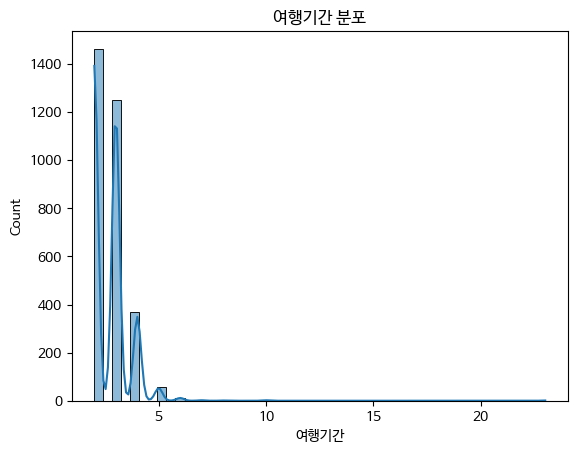

In [ ]:
# 여행 기간 분포 확인
sns.histplot(preprocess_travel_notnull_west['여행기간'], bins = 50, kde = True)
plt.title("여행기간 분포")
plt.show()

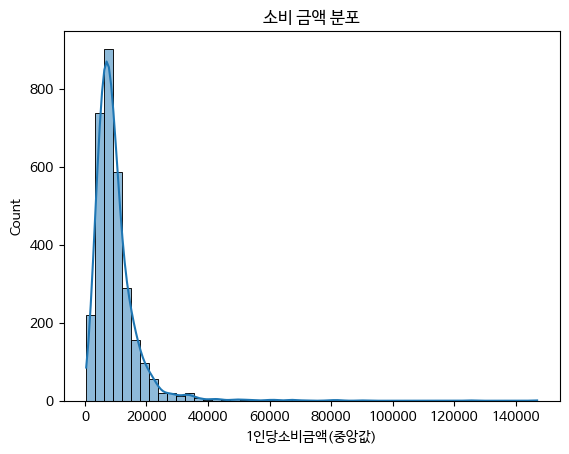

In [ ]:
sns.histplot(preprocess_travel_notnull_west['1인당소비금액(중앙값)'], bins = 50, kde = True)
plt.title("소비 금액 분포")
plt.show()

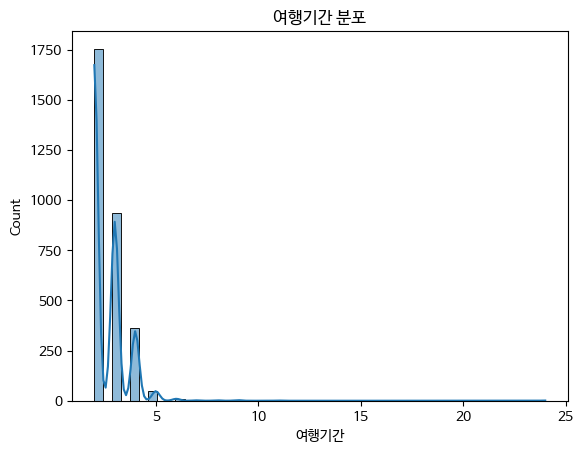

In [ ]:
sns.histplot(preprocess_travel_notnull_capital['여행기간'], bins = 50, kde = True)
plt.title("여행기간 분포")
plt.show()

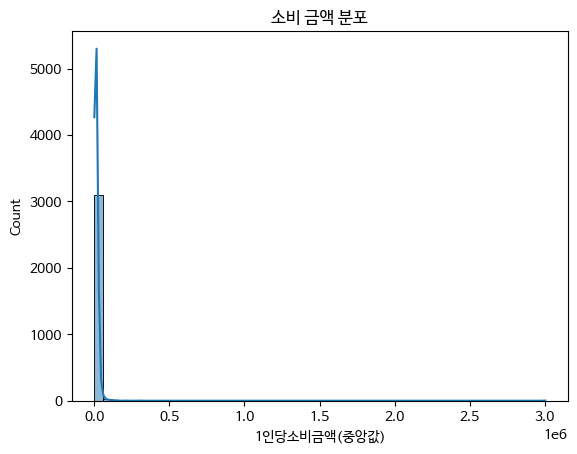

In [ ]:
sns.histplot(preprocess_travel_notnull_capital['1인당소비금액(중앙값)'], bins = 50, kde = True)
plt.title("소비 금액 분포")
plt.show()

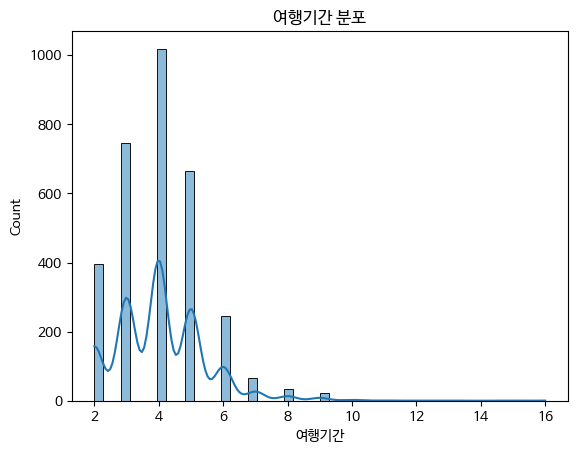

In [ ]:
sns.histplot(preprocess_travel_notnull_jeju['여행기간'], bins = 50, kde = True)
plt.title("여행기간 분포")
plt.show()

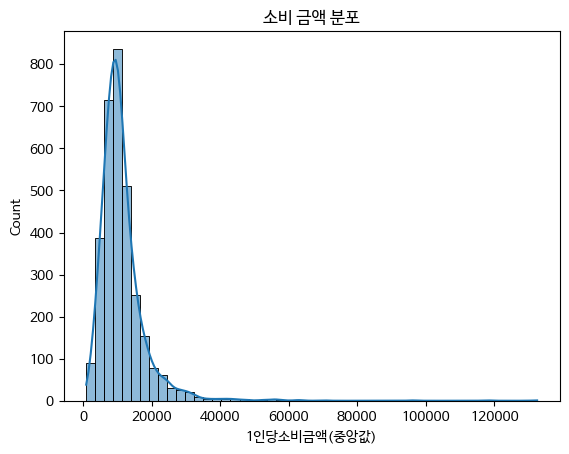

In [ ]:
sns.histplot(preprocess_travel_notnull_jeju['1인당소비금액(중앙값)'], bins = 50, kde = True)
plt.title("소비 금액 분포")
plt.show()

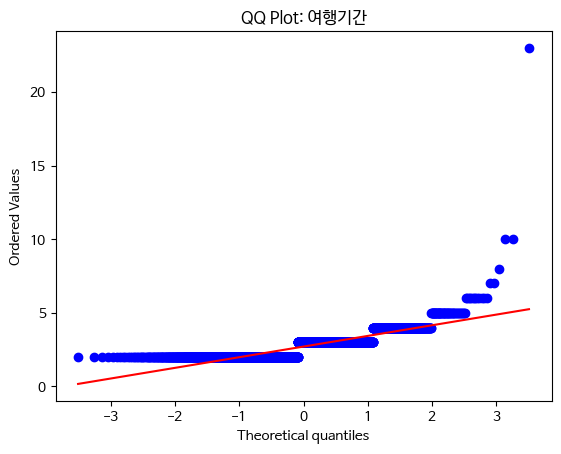

Shapiro-Wilk Test: stat = 0.6710, p-value = 2.147727989162692e-61


In [ ]:
# 정규성 검정

## QQ Plot
stats.probplot(preprocess_travel_notnull_west['여행기간'], dist="norm", plot=plt)
plt.title("QQ Plot: 여행기간")
plt.show()

## Shapiro-Wilk Test
stat, p = stats.shapiro(preprocess_travel_notnull_west['여행기간'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

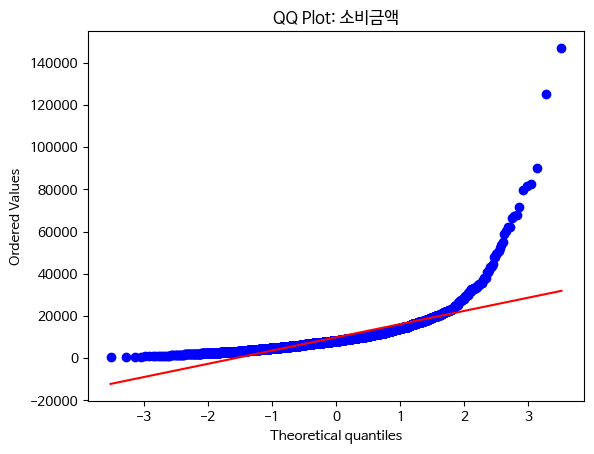

Shapiro-Wilk Test: stat = 0.6365, p-value = 2.895754387706854e-63


In [ ]:
## QQ Plot
stats.probplot(preprocess_travel_notnull_west['1인당소비금액(중앙값)'], dist="norm", plot=plt)
plt.title("QQ Plot: 소비금액")
plt.show()

## Shapiro-Wilk Test
stat, p = stats.shapiro(preprocess_travel_notnull_west['1인당소비금액(중앙값)'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

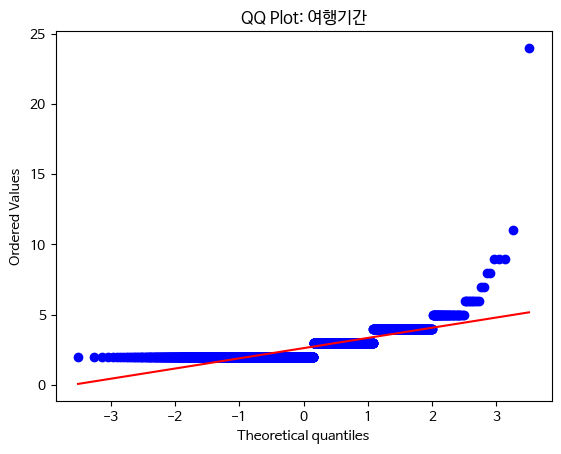

Shapiro-Wilk Test: stat = 0.6228, p-value = 9.308378576246207e-64


In [ ]:
## QQ Plot
stats.probplot(preprocess_travel_notnull_capital['여행기간'], dist="norm", plot=plt)
plt.title("QQ Plot: 여행기간")
plt.show()

## Shapiro-Wilk Test
stat, p = stats.shapiro(preprocess_travel_notnull_capital['여행기간'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

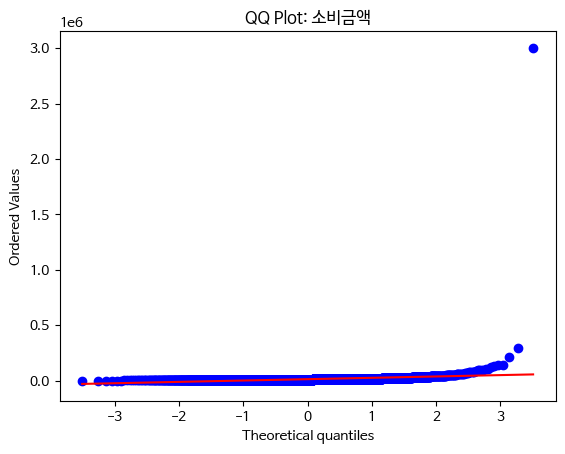

Shapiro-Wilk Test: stat = 0.0514, p-value = 1.8701822126763815e-82


In [ ]:
## QQ Plot
stats.probplot(preprocess_travel_notnull_capital['1인당소비금액(중앙값)'], dist="norm", plot=plt)
plt.title("QQ Plot: 소비금액")
plt.show()

## Shapiro-Wilk Test
stat, p = stats.shapiro(preprocess_travel_notnull_capital['1인당소비금액(중앙값)'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

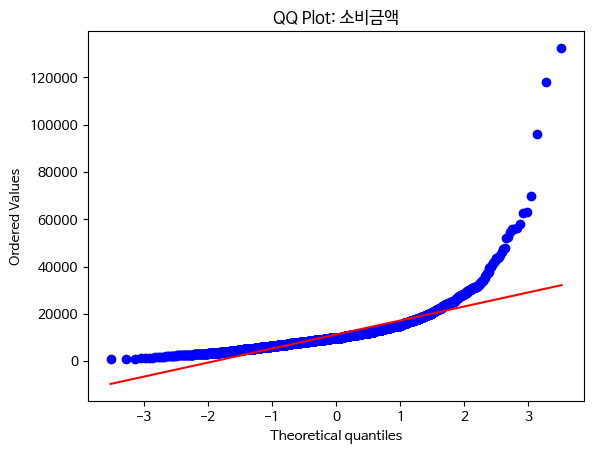

Shapiro-Wilk Test: stat = 0.7003, p-value = 5.557955635973981e-60


In [ ]:
## QQ Plot
stats.probplot(preprocess_travel_notnull_jeju['1인당소비금액(중앙값)'], dist="norm", plot=plt)
plt.title("QQ Plot: 소비금액")
plt.show()

## Shapiro-Wilk Test
stat, p = stats.shapiro(preprocess_travel_notnull_jeju['1인당소비금액(중앙값)'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

In [ ]:
## QQ Plot
stats.probplot(preprocess_travel_notnull_jeju['여행기간'], dist="norm", plot=plt)
plt.title("QQ Plot: 여행기간")
plt.show()

## Shapiro-Wilk Test
stat, p = stats.shapiro(preprocess_travel_notnull_jeju['여행기간'])
print(f"Shapiro-Wilk Test: stat = {stat:.4f}, p-value = {p}")

In [ ]:
preprocess_travel_notnull_west['여행기간'].skew()

np.float64(4.984883310141495)

In [ ]:
preprocess_travel_notnull_capital['여행기간'].skew()

np.float64(5.4607760519727995)

In [ ]:
preprocess_travel_notnull_jeju['여행기간'].skew()

np.float64(1.1972892475483141)

In [ ]:
# 데이터 확인용 csv 파일 저장
preprocess_travel_notnull_west.to_csv('preprocess_travel_notnull_west.csv', index=False, encoding='utf-8')
preprocess_travel_notnull_capital.to_csv('preprocess_travel_notnull_capital.csv', index=False, encoding='utf-8')
preprocess_travel_notnull_jeju.to_csv('preprocess_travel_notnull_jeju.csv', index=False, encoding='utf-8')

# 가설 검정

In [ ]:
# 여행자 수 컬럼 추가
preprocess_travel_notnull_west.loc[:, '여행자수'] = preprocess_travel_notnull_west['여행동반자수'] + 1
preprocess_travel_notnull_capital.loc[:, '여행자수'] = preprocess_travel_notnull_capital['여행동반자수'] + 1
preprocess_travel_notnull_jeju.loc[:, '여행자수'] = preprocess_travel_notnull_jeju['여행동반자수'] + 1

# 그룹별 데이터 나누기
grouped_west = preprocess_travel_notnull_west.groupby('여행자수')
grouped_capital = preprocess_travel_notnull_capital.groupby('여행자수')
grouped_jeju = preprocess_travel_notnull_jeju.groupby('여행자수')


# 여행 기간에 대한 Kruskal-Wallis
## for name, group in grouped : 그룹별 데이터에서 각 그룹의 이름(name)과 해당 그룹에 속한 데이터프레임(group)을 반복해서 꺼냄
## group['여행기간'].dropna() : 반복해서 꺼낸 그룹에서 여행기간 컬럼만 가져와서 결측치(NaN)를 제거한 Series로 만듦
## * : 언패킹 연산자, 위에서 만들어진 리스트를 함수 인자로 쪼개서 전달
KW_duration_west = kruskal(*[group['여행기간'].dropna() for name, group in grouped_west])
KW_duration_capital = kruskal(*[group['여행기간'].dropna() for name, group in grouped_capital])
KW_duration_jeju = kruskal(*[group['여행기간'].dropna() for name, group in grouped_jeju])

# 결과 출력
print("서부권 여행 기간 Kruskal-Wallis:", KW_duration_west)
print("수도권 여행 기간 Kruskal-Wallis:", KW_duration_capital)
print("제주도 여행 기간 Kruskal-Wallis:", KW_duration_jeju)

# 소비 금액에 대한 Kruskal-Wallis
KW_consume_west = kruskal(*[group['1인당소비금액(중앙값)'].dropna() for name, group in grouped_west])
KW_consume_capital = kruskal(*[group['1인당소비금액(중앙값)'].dropna() for name, group in grouped_capital])
KW_consume_jeju = kruskal(*[group['1인당소비금액(중앙값)'].dropna() for name, group in grouped_jeju])

# 결과 출력
print("서부권 소비 금액 Kruskal-Wallis 결과:", KW_consume_west)
print("수도권 소비 금액 Kruskal-Wallis 결과:", KW_consume_capital)
print("제주도 소비 금액 Kruskal-Wallis 결과:", KW_consume_jeju)



서부권 여행 기간 Kruskal-Wallis: KruskalResult(statistic=np.float64(71.45676884869327), pvalue=np.float64(1.2087653801172639e-08))
수도권 여행 기간 Kruskal-Wallis: KruskalResult(statistic=np.float64(49.667535292433), pvalue=np.float64(2.5894614029237266e-05))
제주도 여행 기간 Kruskal-Wallis: KruskalResult(statistic=np.float64(30.54221204299535), pvalue=np.float64(0.032496929778334224))
서부권 소비 금액 Kruskal-Wallis 결과: KruskalResult(statistic=np.float64(131.93644213655935), pvalue=np.float64(7.937432469845075e-20))
수도권 소비 금액 Kruskal-Wallis 결과: KruskalResult(statistic=np.float64(115.50735613919812), pvalue=np.float64(3.9949020870607885e-17))
제주도 소비 금액 Kruskal-Wallis 결과: KruskalResult(statistic=np.float64(202.85986772152077), pvalue=np.float64(2.6831146050405273e-33))


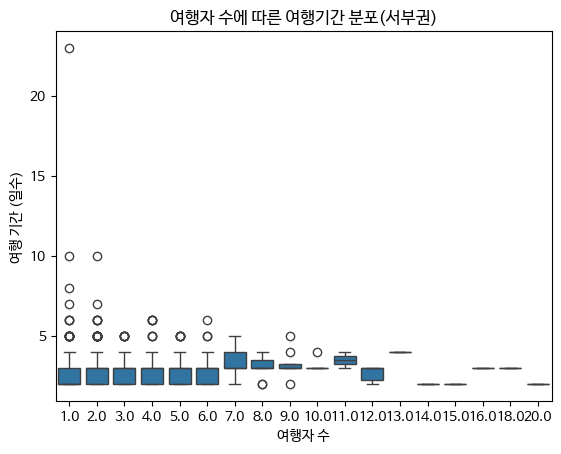

In [ ]:
# 여행자 수 vs 여행 기간 (Kruskal) 시각화
## Boxplot (분포 + 중앙값 시각화)
sns.boxplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull_west)
plt.title("여행자 수에 따른 여행기간 분포(서부권)")
plt.xlabel("여행자 수")
plt.ylabel("여행 기간 (일수)")
plt.show()

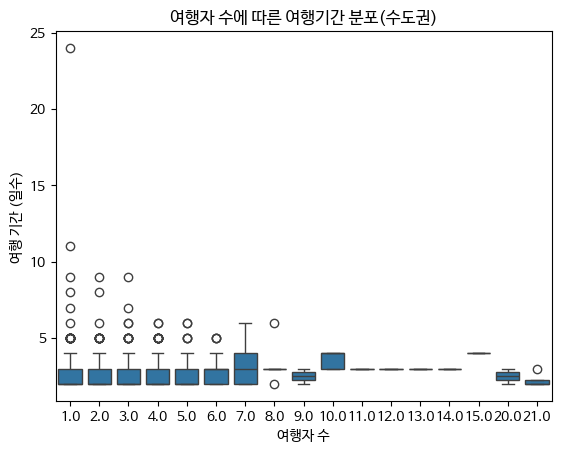

In [ ]:
sns.boxplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull_capital)
plt.title("여행자 수에 따른 여행기간 분포(수도권)")
plt.xlabel("여행자 수")
plt.ylabel("여행 기간 (일수)")
plt.show()

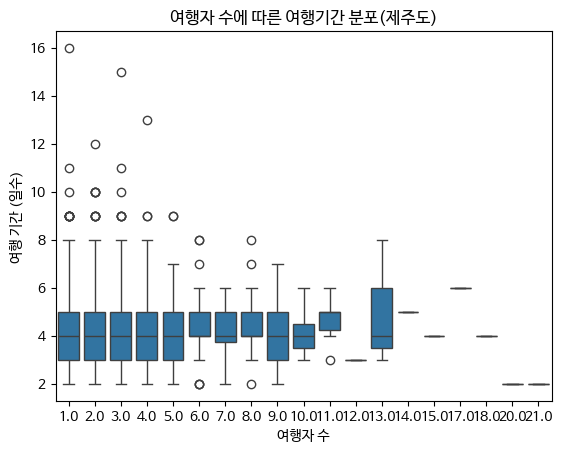

In [ ]:
sns.boxplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull_jeju)
plt.title("여행자 수에 따른 여행기간 분포(제주도)")
plt.xlabel("여행자 수")
plt.ylabel("여행 기간 (일수)")
plt.show()

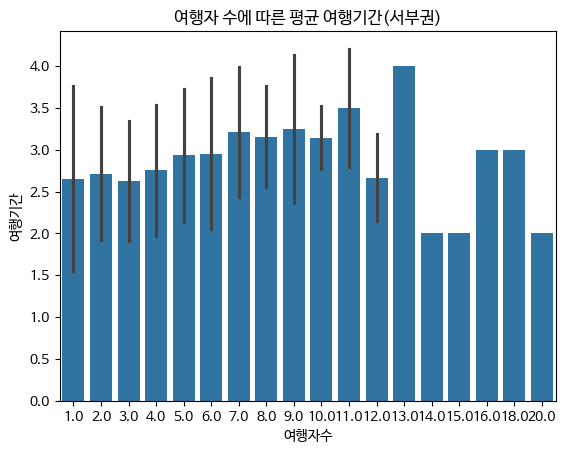

In [ ]:
# 평균 & 표준편차 (barplot)
sns.barplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull_west, errorbar='sd')
plt.title("여행자 수에 따른 평균 여행기간(서부권)")
plt.show()

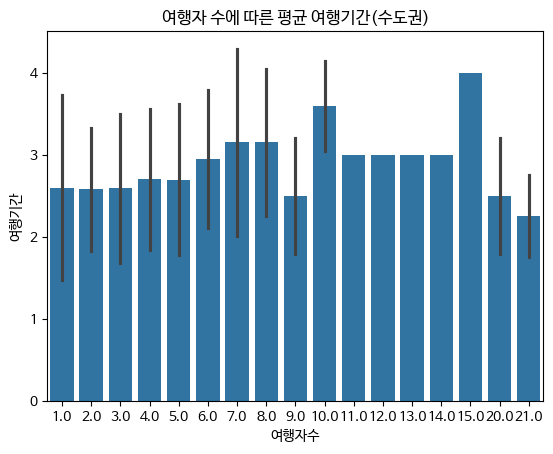

In [ ]:
sns.barplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull_capital, errorbar='sd')
plt.title("여행자 수에 따른 평균 여행기간(수도권)")
plt.show()

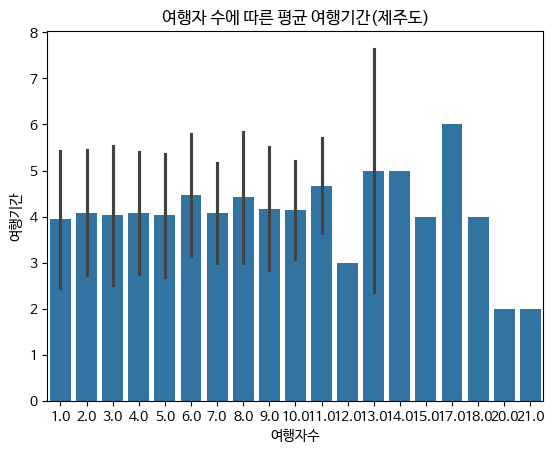

In [ ]:
sns.barplot(x='여행자수', y='여행기간', data=preprocess_travel_notnull_jeju, errorbar='sd')
plt.title("여행자 수에 따른 평균 여행기간(제주도)")
plt.show()

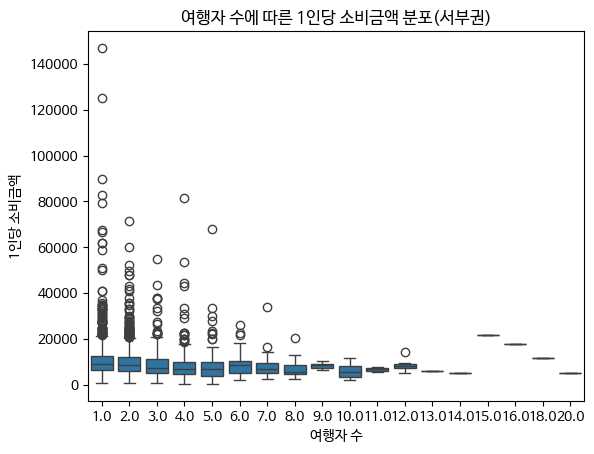

In [ ]:
# 여행자 수 vs 1인당 소비금액(중앙값) (Kruskal 중심 해석)
## Boxplot (이상치 포함 전체 분포 시각화)
sns.boxplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull_west)
plt.title("여행자 수에 따른 1인당 소비금액 분포(서부권)")
plt.xlabel("여행자 수")
plt.ylabel("1인당 소비금액")
plt.show()

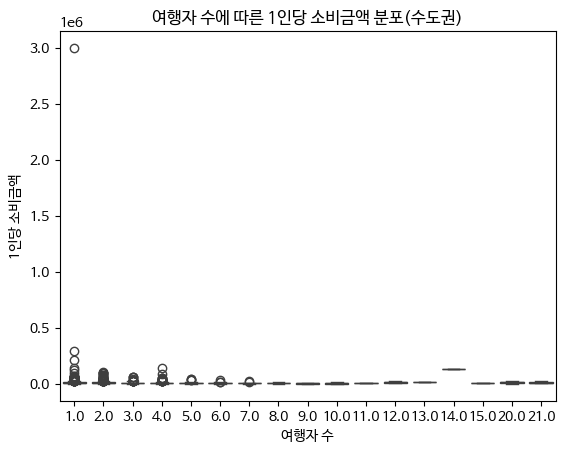

In [ ]:
sns.boxplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull_capital)
plt.title("여행자 수에 따른 1인당 소비금액 분포(수도권)")
plt.xlabel("여행자 수")
plt.ylabel("1인당 소비금액")
plt.show()

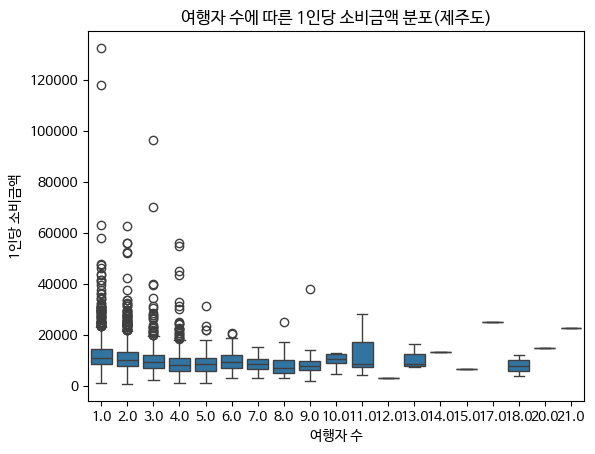

In [ ]:
sns.boxplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull_jeju)
plt.title("여행자 수에 따른 1인당 소비금액 분포(제주도)")
plt.xlabel("여행자 수")
plt.ylabel("1인당 소비금액")
plt.show()

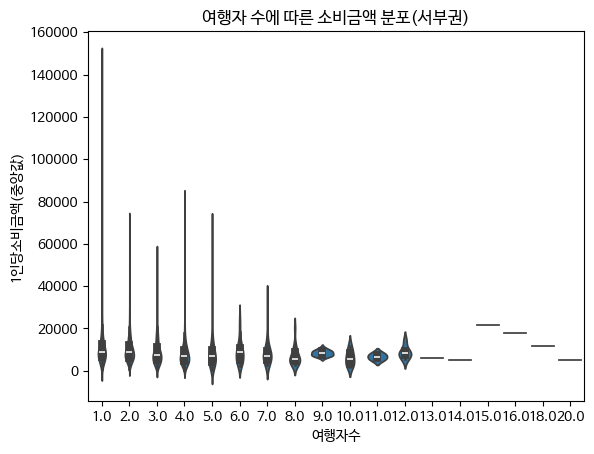

In [ ]:
# Violinplot (분포 밀도 강조)
sns.violinplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull_west, inner='box')
plt.title("여행자 수에 따른 소비금액 분포(서부권)")
plt.show()

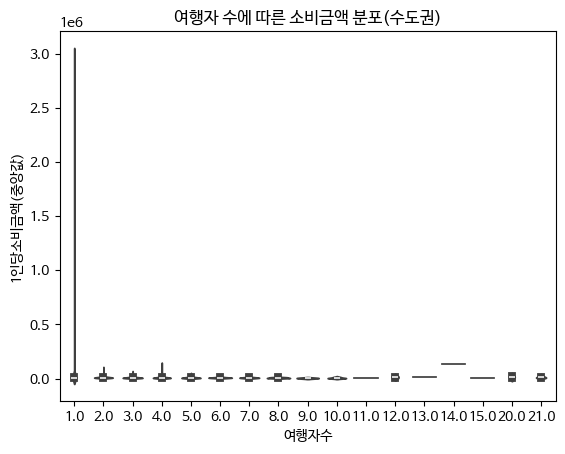

In [ ]:
sns.violinplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull_capital, inner='box')
plt.title("여행자 수에 따른 소비금액 분포(수도권)")
plt.show()

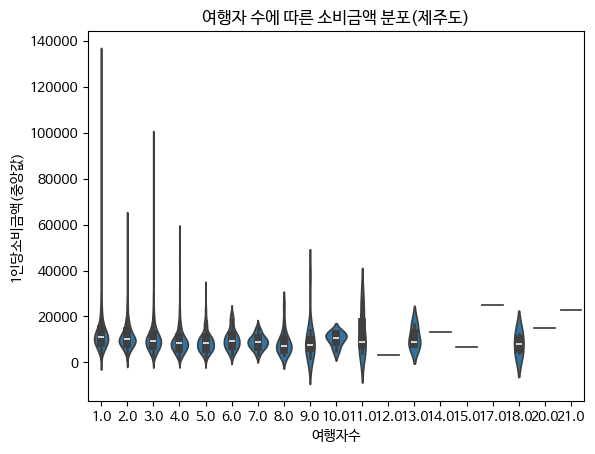

In [ ]:
sns.violinplot(x='여행자수', y='1인당소비금액(중앙값)', data=preprocess_travel_notnull_jeju, inner='box')
plt.title("여행자 수에 따른 소비금액 분포(제주도)")
plt.show()